In [1]:
# Imporing all required libraries

import pandas as hr_ana_EmAtRate_pna
import warnings as hr_ana_EmAtRate_pnw
hr_ana_EmAtRate_pnw.filterwarnings('ignore')
hr_ana_EmAtRate_pnw.simplefilter('ignore')
import seaborn as hr_EmAtRate_s
import matplotlib.pyplot as hr_EmAtRate_n
hr_EmAtRate_n.style.use("fivethirtyeight")
import plotly.express as hr_EmAtRate_p

### Data gathering

In [2]:
GEN_hr_ana_EmAtRate = hr_ana_EmAtRate_pna.read_csv("C:\\Users\\dheer\\OneDrive\\Desktop\\Dissertation\\Data_sets\\general_data.csv")
print('Shape of General_data :' ,GEN_hr_ana_EmAtRate.shape)
Emp_hr_ana_EmAtRate = hr_ana_EmAtRate_pna.read_csv("C:\\Users\\dheer\\OneDrive\\Desktop\\Dissertation\\Data_sets\\employee_survey_data.csv")
print('Shape of Emp_survey_data :' ,Emp_hr_ana_EmAtRate.shape)
Mana_hr_ana_EmAtRate = hr_ana_EmAtRate_pna.read_csv("C:\\Users\\dheer\\OneDrive\\Desktop\\Dissertation\\Data_sets\\manager_survey_data.csv")
print('Shape of Manager_survey_data :' ,Mana_hr_ana_EmAtRate.shape)
log_in_ana_EmAtRate = hr_ana_EmAtRate_pna.read_csv("C:\\Users\\dheer\\OneDrive\\Desktop\\Dissertation\\Data_sets\\in_time.csv")
print('Shape of login_data :' ,log_in_ana_EmAtRate.shape)
log_out_ana_EmAtRate = hr_ana_EmAtRate_pna.read_csv("C:\\Users\\dheer\\OneDrive\\Desktop\\Dissertation\\Data_sets\\out_time.csv")
print('Shape of logout_data :' ,log_out_ana_EmAtRate.shape)

Shape of General_data : (4410, 24)
Shape of Emp_survey_data : (4410, 4)
Shape of Manager_survey_data : (4410, 3)
Shape of login_data : (4410, 262)
Shape of logout_data : (4410, 262)


In [3]:
GEN_hr_ana_EmAtRate.head(4)

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  

[4 rows x 24 columns]

In [4]:
Emp_hr_ana_EmAtRate.head(4)

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0

In [5]:
Mana_hr_ana_EmAtRate.head(4)

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3

### Data Cleaning and Preparation

In [6]:
## Deriving absent_days and average work hours from in_time and out_time.csv

log_in_ana_EmAtRate.head(4)

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29  ...   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26  ...   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 09:55:29  2015-12-22 10:04:06   
1  2015-12-18 10:37:17  2015-12-21 09:49:02  2015-12-22 10:33:51   
2  2015-12-18 10:15:14  2015-12-21 10:10:28  2015-12-22 09:44:44   
3  2015-12-18 10:17:38  2015-12-21 09:58:21  2015-12-22 10:04:25   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 10:14:27  2015-12-24 10:11:35        NaN  2015-12-28 10:13:41   
1  2015-12-23 10:12:10                  NaN        NaN  2015-12-28 09:31:45   
2  2015-12-23 10:15:54  2015-12-24 10:07:26        NaN  2015-12-28 09:42:05   
3  2015-12-23 10:11:46  2015-12-24 09:43:15        NaN  2015-12-28 09:52:44   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 10:03:36  2015-12-30 09:54:12  2015-12-31 10:12:44  
1  2015-12-29 09:55:49  2015-12-30 10:32:25  2015-12-31 09:27:20  
2  2015-12-29 09:43:36  2015-12-30 09:34:05  2015-12-31 10:28:39  
3  2015-12-29 09:33:16  2015-12-30 10:18:12  2015-12-31 10:01:15  

[4 rows x 262 columns]

In [7]:
del log_in_ana_EmAtRate['Unnamed: 0']

In [8]:
log_out_ana_EmAtRate.head(4)

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13  ...   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25  ...   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
1  2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
2  2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
3  2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 16:44:44  2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
1  2015-12-23 17:38:18                  NaN        NaN  2015-12-28 17:08:38   
2  2015-12-23 16:59:43  2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
3  2015-12-23 17:36:35  2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
1  2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
2  2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
3  2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  

[4 rows x 262 columns]

In [9]:
del log_out_ana_EmAtRate['Unnamed: 0']

### Checking for Missing values

In [10]:
hr = hr_ana_EmAtRate_pna.merge(Emp_hr_ana_EmAtRate, GEN_hr_ana_EmAtRate, how='inner', on='EmployeeID')
hr_data = hr_ana_EmAtRate_pna.merge(Mana_hr_ana_EmAtRate, hr, how='inner', on='EmployeeID')

print("Missing values in general_data  : ",GEN_hr_ana_EmAtRate.isnull().values.sum())
print("Missing values in employee_data : ",Emp_hr_ana_EmAtRate.isnull().values.sum())
print("Missing values in manager_data  : ",Mana_hr_ana_EmAtRate.isnull().values.sum())
print("Total Missing values            : ", hr_data.isnull().values.sum())


# Assuming you have loaded your dataset into a pandas DataFrame called 'data'
total_rows =hr_data.shape[0]  # Total number of rows in the dataset
missing_values = hr_data.isnull().sum().sum()  # Total number of missing values in the dataset

percentage_missing = (missing_values / total_rows) * 100
print(f"Percentage of missing values: {percentage_missing:.3f}%")


Missing values in general_data  :  28
Missing values in employee_data :  83
Missing values in manager_data  :  0
Total Missing values            :  111
Percentage of missing values: 2.517%


In [11]:
### Imputation of the Missing values

In [12]:
GEN_hr_ana_EmAtRate.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [13]:
### Fill null data from columns 'NumCompaniesWorked' & 'TotalWorkingYears' with median or mean value
GEN_hr_ana_EmAtRate['NumCompaniesWorked'].fillna(int(GEN_hr_ana_EmAtRate['NumCompaniesWorked'].median()), inplace=True)
GEN_hr_ana_EmAtRate['TotalWorkingYears'].fillna(int(GEN_hr_ana_EmAtRate['TotalWorkingYears'].mean()), inplace=True)
GEN_hr_ana_EmAtRate

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences              1           2   
2                   17          4          Other              1           3   
3                    2          5  Life Sciences              1           4   
4                   10          1        Medical              1           5   
...                ...        ...            ...            ...         ...   
4405                 5          4        Medical              1        4406   
4406                 2          4        Medical              1        4407   
4407                25          2  Life Sciences              1        4408   
4408                18          2        Medical              1        4409   
4409                28          3        Medical              1        4410   

      Gender  ...  NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0     Female  ...                 1.0      Y                11              8   
1     Female  ...                 0.0      Y                23              8   
2       Male  ...                 1.0      Y                15              8   
3       Male  ...                 3.0      Y                11              8   
4       Male  ...                 4.0      Y                12              8   
...      ...  ...                 ...    ...               ...            ...   
4405  Female  ...                 3.0      Y                17              8   
4406    Male  ...                 2.0      Y                15              8   
4407    Male  ...                 0.0      Y                20              8   
4408    Male  ...                 0.0      Y                14              8   
4409    Male  ...                 0.0      Y                12              8   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0               1.0                      6   
1                    1               6.0                      3   
2                    3               5.0                      2   
3                    3              13.0                      5   
4                    2               9.0                      2   
...                ...               ...                    ...   
4405                 1              10.0                      5   
4406                 0              10.0                      2   
4407                 0               5.0                      4   
4408                 1              10.0                      2   
4409                 0              11.0                      6   

      YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  
0                  1                        0                     0  
1                  5                        1                     4  
2                  5                        0                     3  
3                  8                        7                     5  
4                  6                        0                     4  
...              ...                      ...                   ..

In [14]:
Emp_hr_ana_EmAtRate.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [15]:
### Fill null data from columns 'EnvironmentSatisfaction', 'JobSatisfaction' & 'WorkLifeBalance' with MODE value
Emp_hr_ana_EmAtRate['EnvironmentSatisfaction'].fillna(int(Emp_hr_ana_EmAtRate['EnvironmentSatisfaction'].mode()), inplace=True)
Emp_hr_ana_EmAtRate['JobSatisfaction'].fillna(int(Emp_hr_ana_EmAtRate['JobSatisfaction'].mode()), inplace=True)
Emp_hr_ana_EmAtRate['WorkLifeBalance'].fillna(int(Emp_hr_ana_EmAtRate['WorkLifeBalance'].mode()), inplace=True)
Emp_hr_ana_EmAtRate

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0              1                      3.0              4.0              2.0
1              2                      3.0              2.0              4.0
2              3                      2.0              2.0              1.0
3              4                      4.0              4.0              3.0
4              5                      4.0              1.0              3.0
...          ...                      ...              ...              ...
4405        4406                      4.0              1.0              3.0
4406        4407                      4.0              4.0              3.0
4407        4408                      1.0              3.0              3.0
4408        4409                      4.0              1.0              3.0
4409        4410                      1.0              3.0              3.0

[4410 rows x 4 columns]

In [16]:
# Drop the Days with NA,that means all employees are off, from log_in_ana_EmAtRate and log_out_ana_EmAtRate DataFrame
log_in_ana_EmAtRate = log_in_ana_EmAtRate.loc[:, log_in_ana_EmAtRate.notna().any()]
display(log_in_ana_EmAtRate)

log_out_ana_EmAtRate = log_out_ana_EmAtRate.loc[:, log_out_ana_EmAtRate.notna().any()]
display(log_out_ana_EmAtRate)

2015-01-02           2015-01-05           2015-01-06  \
0     2015-01-02 09:43:45  2015-01-05 10:08:48  2015-01-06 09:54:26   
1     2015-01-02 10:15:44  2015-01-05 10:21:05                  NaN   
2     2015-01-02 10:17:41  2015-01-05 09:50:50  2015-01-06 10:14:13   
3     2015-01-02 10:05:06  2015-01-05 09:56:32  2015-01-06 10:11:07   
4     2015-01-02 10:28:17  2015-01-05 09:49:58  2015-01-06 09:45:28   
...                   ...                  ...                  ...   
4405  2015-01-02 09:20:32  2015-01-05 10:17:53  2015-01-06 10:26:51   
4406  2015-01-02 10:03:41                  NaN  2015-01-06 09:44:00   
4407  2015-01-02 10:01:01  2015-01-05 09:33:00  2015-01-06 09:49:17   
4408  2015-01-02 10:17:05  2015-01-05 10:02:27  2015-01-06 10:12:50   
4409  2015-01-02 09:59:09  2015-01-05 10:16:14  2015-01-06 09:52:30   

               2015-01-07           2015-01-08           2015-01-09  \
0     2015-01-07 09:34:31  2015-01-08 09:51:09  2015-01-09 10:09:25   
1     2015-01-07 09:45:17  2015-01-08 10:09:04  2015-01-09 09:43:26   
2     2015-01-07 09:47:27  2015-01-08 10:03:40  2015-01-09 10:05:49   
3     2015-01-07 09:37:30  2015-01-08 10:02:08  2015-01-09 10:08:12   
4     2015-01-07 09:49:37  2015-01-08 10:19:44  2015-01-09 10:00:50   
...                   ...                  ...                  ...   
4405  2015-01-07 10:06:58  2015-01-08 09:45:06  2015-01-09 09:49:24   
4406  2015-01-07 09:42:10  2015-01-08 10:00:57  2015-01-09 09:44:04   
4407  2015-01-07 10:28:12  2015-01-08 09:47:38  2015-01-09 10:01:03   
4408  2015-01-07 10:12:31  2015-01-08 09:42:57                  NaN   
4409  2015-01-07 09:43:15  2015-01-08 10:06:55  2015-01-09 10:27:39   

               2015-01-12           2015-01-13           2015-01-15  \
0     2015-01-12 09:42:53  2015-01-13 10:13:06  2015-01-15 10:01:24   
1     2015-01-12 10:00:07  2015-01-13 10:43:29  2015-01-15 09:37:57   
2     2015-01-12 10:03:47  2015-01-13 10:21:26  2015-01-15 09:55:11   
3     2015-01-12 10:13:42  2015-01-13 09:53:22  2015-01-15 10:00:50   
4     2015-01-12 10:29:27  2015-01-13 09:59:32  2015-01-15 10:06:12   
...                   ...                  ...                  ...   
4405  2015-01-12 09:37:10  2015-01-13 09:25:02  2015-01-15 09:29:17   
4406  2015-01-12 10:07:32  2015-01-13 10:05:11  2015-01-15 10:18:11   
4407  2015-01-12 09:49:12  2015-01-13 09:47:10  2015-01-15 10:08:31   
4408  2015-01-12 10:00:38  2015-01-13 09:48:03  2015-01-15 09:04:17   
4409  2015-01-12 09:47:35  2015-01-13 09:30:00  2015-01-15 10:08:19   

               2015-01-16  ...           2015-12-17           2015-12-18  \
0     2015-01-16 10:19:08  ...                  NaN                  NaN   
1     2015-01-16 09:57:18  ...  2015-12-17 09:15:08  2015-12-18 10:37:17   
2     2015-01-16 10:05:36  ...  2015-12-17 09:53:17  2015-12-18 10:15:14   
3     2015-01-16 09:58:06  ...  2015-12-17 09:54:36  2015-12-18 10:17:38   
4     2015-01-16 10:03:50  ...  2015-12-17 09:46:35  2015-12-18 09:58:35   
...                   ...  ...                  ...                  ...   
4405  2015-01-16 09:49:37  ...  2015-12-17 10:05:22  2015-12-18 10:01:06   
4406  2015-01-16 09:55:05  ...  2015-12-17 09:45:49  2015-12-18 09:27:32   
4407  2015-01-16 10:18:40  ...  2015-12-17 10:01:36  2015-12-18 10:00:57   
4408  2015-01-16 10:04:15  ...  2015-12-17 09:51:40  2015-12-18 09:54:33   
4409  2015-01-16 09:55:03  ...  2015-12-17 09:58:17  2015-12-18 10:20:40   

               2015-12-21           2015-12-22           2015-12-23  \
0     2015-12-21 09:55:29  2015-12-22 10:04:06  2015-12-23 10:14:27   
1     2015-12-21 09:49:02  2015-12-22 10:33:51  2015-12-23 10:12:10   
2     2015-12-21 10:10:28  2015-12-22 09:44:44  2015-12-23 10:15:54   
3     2015-12-21 09:58:21  2015-12-22 10:04:25  2015-12-23 10:11:46   
4     2015-12-21 10:03:41  2015-12-22 10:10:30  2015-12-23 10:13:36   
...                   ...                  ...                  ...   
4405  2015-12-21 10:25:25  2015-12-22 10:16:11

2015-01-02           2015-01-05           2015-01-06  \
0     2015-01-02 16:56:15  2015-01-05 17:20:11  2015-01-06 17:19:05   
1     2015-01-02 18:22:17  2015-01-05 17:48:22                  NaN   
2     2015-01-02 16:59:14  2015-01-05 17:06:46  2015-01-06 16:38:32   
3     2015-01-02 17:25:24  2015-01-05 17:14:03  2015-01-06 17:07:42   
4     2015-01-02 18:31:37  2015-01-05 17:49:15  2015-01-06 17:26:25   
...                   ...                  ...                  ...   
4405  2015-01-02 17:27:37  2015-01-05 19:08:20  2015-01-06 18:50:49   
4406  2015-01-02 16:19:01                  NaN  2015-01-06 15:07:37   
4407  2015-01-02 17:17:35  2015-01-05 17:08:07  2015-01-06 17:27:46   
4408  2015-01-02 19:48:37  2015-01-05 19:37:40  2015-01-06 20:00:08   
4409  2015-01-02 16:49:19  2015-01-05 17:33:02  2015-01-06 16:36:10   

               2015-01-07           2015-01-08           2015-01-09  \
0     2015-01-07 16:34:55  2015-01-08 17:08:32  2015-01-09 17:38:29   
1     2015-01-07 17:09:06  2015-01-08 17:34:04  2015-01-09 16:52:29   
2     2015-01-07 16:33:21  2015-01-08 17:24:22  2015-01-09 16:57:30   
3     2015-01-07 16:32:40  2015-01-08 16:53:11  2015-01-09 17:19:47   
4     2015-01-07 17:37:59  2015-01-08 17:59:28  2015-01-09 17:44:08   
...                   ...                  ...                  ...   
4405  2015-01-07 18:57:40  2015-01-08 17:58:31  2015-01-09 18:06:15   
4406  2015-01-07 15:25:50  2015-01-08 16:12:33  2015-01-09 15:26:56   
4407  2015-01-07 18:27:22  2015-01-08 17:05:25  2015-01-09 17:02:57   
4408  2015-01-07 19:35:59  2015-01-08 18:55:13                  NaN   
4409  2015-01-07 16:33:47  2015-01-08 17:32:31  2015-01-09 17:25:58   

               2015-01-12           2015-01-13           2015-01-15  \
0     2015-01-12 16:58:39  2015-01-13 18:02:58  2015-01-15 17:22:13   
1     2015-01-12 17:36:48  2015-01-13 18:00:13  2015-01-15 17:14:44   
2     2015-01-12 17:28:54  2015-01-13 17:21:25  2015-01-15 17:21:29   
3     2015-01-12 17:13:37  2015-01-13 17:11:45  2015-01-15 16:53:26   
4     2015-01-12 18:51:21  2015-01-13 18:14:58  2015-01-15 18:21:48   
...                   ...                  ...                  ...   
4405  2015-01-12 17:58:48  2015-01-13 18:10:35  2015-01-15 17:50:37   
4406  2015-01-12 16:10:42  2015-01-13 16:22:43  2015-01-15 16:19:00   
4407  2015-01-12 17:35:45  2015-01-13 17:15:52  2015-01-15 18:15:53   
4408  2015-01-12 19:18:17  2015-01-13 19:24:02  2015-01-15 18:33:21   
4409  2015-01-12 16:39:21  2015-01-13 16:59:28  2015-01-15 17:13:51   

               2015-01-16  ...           2015-12-17           2015-12-18  \
0     2015-01-16 17:35:11  ...                  NaN                  NaN   
1     2015-01-16 17:40:57  ...  2015-12-17 17:10:50  2015-12-18 18:31:28   
2     2015-01-16 17:18:13  ...  2015-12-17 17:06:23  2015-12-18 17:02:23   
3     2015-01-16 16:52:34  ...  2015-12-17 17:21:57  2015-12-18 17:55:23   
4     2015-01-16 18:28:03  ...  2015-12-17 18:05:47  2015-12-18 17:52:48   
...                   ...  ...                  ...                  ...   
4405  2015-01-16 18:50:04  ...  2015-12-17 18:35:39  2015-12-18 18:06:05   
4406  2015-01-16 15:30:38  ...  2015-12-17 15:44:50  2015-12-18 15:23:02   
4407  2015-01-16 18:00:37  ...  2015-12-17 17:42:43  2015-12-18 17:48:05   
4408  2015-01-16 19:24:36  ...  2015-12-17 19:06:58  2015-12-18 19:52:44   
4409  2015-01-16 16:46:25  ...  2015-12-17 17:05:40  2015-12-18 17:23:49   

               2015-12-21           2015-12-22           2015-12-23  \
0     2015-12-21 17:15:50  2015-12-22 17:27:51  2015-12-23 16:44:44   
1     2015-12-21 17:34:16  2015-12-22 18:16:35  2015-12-23 17:38:18   
2     2015-12-21 17:20:17  2015-12-22 16:32:50  2015-12-23 16:59:43   
3     2015-12-21 16:49:09  2015-12-22 17:24:00  2015-12-23 17:36:35   
4     2015-12-21 17:43:35  2015-12-22 18:07:57  2015-12-23 18:00:49   
...                   ...                  ...                  ...   
4405  2015-12-21 18:35:06  2015-12-22 18:33:44

In [17]:
log_in_ana_EmAtRate.fillna("2015-01-01 00:00:00",inplace=True) ## fill null with zero time format in log in time  data
log_out_ana_EmAtRate.fillna("2015-01-01 00:00:00",inplace=True) ## fill null with zero time format in log out time data

In [18]:
log_in_ana_EmAtRate =log_in_ana_EmAtRate.apply(hr_ana_EmAtRate_pna.to_datetime,errors="raise")
log_out_ana_EmAtRate =log_out_ana_EmAtRate.apply(hr_ana_EmAtRate_pna.to_datetime,errors="raise")

In [19]:
log_in_ana_EmAtRate.head(4)
log_out_ana_EmAtRate.head(4)

2015-01-02          2015-01-05          2015-01-06  \
0 2015-01-02 16:56:15 2015-01-05 17:20:11 2015-01-06 17:19:05   
1 2015-01-02 18:22:17 2015-01-05 17:48:22 2015-01-01 00:00:00   
2 2015-01-02 16:59:14 2015-01-05 17:06:46 2015-01-06 16:38:32   
3 2015-01-02 17:25:24 2015-01-05 17:14:03 2015-01-06 17:07:42   

           2015-01-07          2015-01-08          2015-01-09  \
0 2015-01-07 16:34:55 2015-01-08 17:08:32 2015-01-09 17:38:29   
1 2015-01-07 17:09:06 2015-01-08 17:34:04 2015-01-09 16:52:29   
2 2015-01-07 16:33:21 2015-01-08 17:24:22 2015-01-09 16:57:30   
3 2015-01-07 16:32:40 2015-01-08 16:53:11 2015-01-09 17:19:47   

           2015-01-12          2015-01-13          2015-01-15  \
0 2015-01-12 16:58:39 2015-01-13 18:02:58 2015-01-15 17:22:13   
1 2015-01-12 17:36:48 2015-01-13 18:00:13 2015-01-15 17:14:44   
2 2015-01-12 17:28:54 2015-01-13 17:21:25 2015-01-15 17:21:29   
3 2015-01-12 17:13:37 2015-01-13 17:11:45 2015-01-15 16:53:26   

           2015-01-16  ...          2015-12-17          2015-12-18  \
0 2015-01-16 17:35:11  ... 2015-01-01 00:00:00 2015-01-01 00:00:00   
1 2015-01-16 17:40:57  ... 2015-12-17 17:10:50 2015-12-18 18:31:28   
2 2015-01-16 17:18:13  ... 2015-12-17 17:06:23 2015-12-18 17:02:23   
3 2015-01-16 16:52:34  ... 2015-12-17 17:21:57 2015-12-18 17:55:23   

           2015-12-21          2015-12-22          2015-12-23  \
0 2015-12-21 17:15:50 2015-12-22 17:27:51 2015-12-23 16:44:44   
1 2015-12-21 17:34:16 2015-12-22 18:16:35 2015-12-23 17:38:18   
2 2015-12-21 17:20:17 2015-12-22 16:32:50 2015-12-23 16:59:43   
3 2015-12-21 16:49:09 2015-12-22 17:24:00 2015-12-23 17:36:35   

           2015-12-24          2015-12-28          2015-12-29  \
0 2015-12-24 17:47:22 2015-12-28 18:00:07 2015-12-29 17:22:30   
1 2015-01-01 00:00:00 2015-12-28 17:08:38 2015-12-29 17:54:46   
2 2015-12-24 16:58:25 2015-12-28 16:43:31 2015-12-29 17:09:56   
3 2015-12-24 16:48:21 2015-12-28 17:19:34 2015-12-29 16:58:16   

           2015-12-30          2015-12-31  
0 2015-12-30 17:40:56 2015-12-31 17:17:33  
1 2015-12-30 18:31:35 2015-12-31 17:40:58  
2 2015-12-30 17:06:25 2015-12-31 17:15:50  
3 2015-12-30 17:40:11 2015-12-31 17:09:14  

[4 rows x 249 columns]

In [20]:
time_diff=  hr_ana_EmAtRate_pna.DataFrame()

In [21]:
## Derving Working hours

time= log_in_ana_EmAtRate.columns
for l in time:
    time_diff[l]=((hr_ana_EmAtRate_pna.to_datetime(log_out_ana_EmAtRate[l].astype(str)) -
                             hr_ana_EmAtRate_pna.to_datetime(log_in_ana_EmAtRate[l].astype(str))).dt.total_seconds() / 3600.0)
time_diff

2015-01-02  2015-01-05  2015-01-06  2015-01-07  2015-01-08  2015-01-09  \
0       7.208333    7.189722    7.410833    7.006667    7.289722    7.484444   
1       8.109167    7.454722    0.000000    7.396944    7.416667    7.150833   
2       6.692500    7.265556    6.405278    6.765000    7.345000    6.861389   
3       7.338333    7.291944    6.943056    6.919444    6.850833    7.193056   
4       8.055556    7.988056    7.682500    7.806111    7.662222    7.721667   
...          ...         ...         ...         ...         ...         ...   
4405    8.118056    8.840833    8.399444    8.845000    8.223611    8.280833   
4406    6.255556    0.000000    5.393611    5.727778    6.193333    5.714444   
4407    7.276111    7.585278    7.641389    7.986111    7.296389    7.031667   
4408    9.525556    9.586944    9.788333    9.391111    9.204444    0.000000   
4409    6.836111    7.280000    6.727778    6.842222    7.426667    6.971944   

      2015-01-12  2015-01-13  2015-01-15  2015-01-16  ...  2015-12-17  \
0       7.262778    7.831111    7.346944    7.267500  ...    0.000000   
1       7.611389    7.278889    7.613056    7.727500  ...    7.928333   
2       7.418611    6.999722    7.438333    7.210278  ...    7.218333   
3       6.998611    7.306389    6.876667    6.907778  ...    7.455833   
4       8.365000    8.257222    8.260000    8.403611  ...    8.320000   
...          ...         ...         ...         ...  ...         ...   
4405    8.360556    8.759167    8.355556    9.007500  ...    8.504722   
4406    6.052778    6.292222    6.013611    5.592500  ...    5.983611   
4407    7.775833    7.478333    8.122778    7.699167  ...    7.685278   
4408    9.294167    9.599722    9.484444    9.339167  ...    9.255000   
4409    6.862778    7.491111    7.092222    6.856111  ...    7.123056   

      2015-12-18  2015-12-21  2015-12-22  2015-12-23  2015-12-24  2015-12-28  \
0       0.000000    7.339167    7.395833    6.504722    7.596389    7.773889   
1       7.903056    7.753889    7.712222    7.435556    0.000000    7.614722   
2       6.785833    7.163611    6.801667    6.730278    6.849722    7.023889   
3       7.629167    6.846667    7.326389    7.413611    7.085000    7.447222   
4       7.903611    7.665000    7.957500    7.786944    8.249444    7.662222   
...          ...         ...         ...         ...         ...         ...   
4405    8.083056    8.161389    8.292500    8.604444    8.596944    8.482222   
4406    5.925000    5.830556    5.924722    6.110556    5.992778    5.669722   
4407    7.785556    7.866111    7.753611    7.752222    7.401944    7.734444   
4408    9.969722    9.340833    9.372500    9.241667    9.697778   10.053056   
4409    7.052500    7.001944    0.000000    6.720000    6.306667    7.559167   

      2015-12-29  2015-12-30  2015-12-31  
0       7.315000    7.778889    7.080278  
1       7.982500    7.986111    8.227222  
2       7.438889    7.538889    6.786389  
3       7.416667    7.366389    7.133056  
4       8.268611    7.953333    8.018056  
...          ...         ...         ...  
4405    9.074722    8.943611    8.508056  
4406    6.558333    5.702222    6.147500  
4407    0.000000    7.760556    8.090278  
4408    9.012222    9.360556    9.616111  
4409    7.184444    6.951667    6.497222  

[4410 rows x 249 columns]

In [22]:
## if the Working hours equals to zero ,then assign it is a absent day
time_diff['absent_days']=(time_diff == 0).astype(int).sum(axis=1) 

In [23]:
## Average working hours for each employees
time_diff['avg_work_hours']=round(time_diff.astype(int).mean(axis=1),2) 

In [24]:
# Making the data frame with the derived columns 'absent days' and avg_work_hours

time_diff= time_diff[['absent_days', 'avg_work_hours']]
time_diff

absent_days  avg_work_hours
0              17            6.48
1              13            6.82
2               7            6.30
3              14            6.39
4               4            7.34
...           ...             ...
4405            6            7.85
4406            8            5.50
4407           18            6.69
4408            8            8.70
4409           17            6.08

[4410 rows x 2 columns]

In [25]:
## Merge all data frames into one based on Employee_Id

hr_ana_EmAtRate = hr_ana_EmAtRate_pna.merge(Emp_hr_ana_EmAtRate, GEN_hr_ana_EmAtRate, how='inner', on='EmployeeID')
hr_EmAtRate = hr_ana_EmAtRate_pna.merge(Mana_hr_ana_EmAtRate, hr_ana_EmAtRate, how='inner', on='EmployeeID')

hr_EmAtRate= hr_ana_EmAtRate_pna.concat([hr_EmAtRate,time_diff], axis=1, ignore_index=False)
hr_EmAtRate.head() # the final combined dataframe

EmployeeID  JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0           1               3                  3                      3.0   
1           2               2                  4                      3.0   
2           3               3                  3                      2.0   
3           4               2                  3                      4.0   
4           5               3                  3                      4.0   

   JobSatisfaction  WorkLifeBalance  Age Attrition     BusinessTravel  \
0              4.0              2.0   51        No      Travel_Rarely   
1              2.0              4.0   31       Yes  Travel_Frequently   
2              2.0              1.0   32        No  Travel_Frequently   
3              4.0              3.0   38        No         Non-Travel   
4              1.0              3.0   32        No      Travel_Rarely   

               Department  ...  PercentSalaryHike  StandardHours  \
0                   Sales  ...                 11              8   
1  Research & Development  ...                 23              8   
2  Research & Development  ...                 15              8   
3  Research & Development  ...                 11              8   
4  Research & Development  ...                 12              8   

  StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  YearsAtCompany  \
0                0                1.0                     6               1   
1                1                6.0                     3               5   
2                3                5.0                     2               5   
3                3               13.0                     5               8   
4                2                9.0                     2               6   

  YearsSinceLastPromotion YearsWithCurrManager  absent_days  avg_work_hours  
0                       0                    0           17            6.48  
1                       1                    4           13            6.82  
2                       0                    3            7            6.30  
3                       7                    5           14            6.39  
4                       0                    4            4            7.34  

[5 rows x 31 columns]

### Data Exploration

In [26]:
print('Shape of merged_Emp_data :',hr_EmAtRate.shape)

Shape of merged_Emp_data : (4410, 31)


In [27]:
hr_EmAtRate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   JobInvolvement           4410 non-null   int64  
 2   PerformanceRating        4410 non-null   int64  
 3   EnvironmentSatisfaction  4410 non-null   float64
 4   JobSatisfaction          4410 non-null   float64
 5   WorkLifeBalance          4410 non-null   float64
 6   Age                      4410 non-null   int64  
 7   Attrition                4410 non-null   object 
 8   BusinessTravel           4410 non-null   object 
 9   Department               4410 non-null   object 
 10  DistanceFromHome         4410 non-null   int64  
 11  Education                4410 non-null   int64  
 12  EducationField           4410 non-null   object 
 13  EmployeeCount            4410 non-null   int64  
 14  Gender                  

In [28]:
hr_EmAtRate.describe()

EmployeeID  JobInvolvement  PerformanceRating  \
count  4410.000000     4410.000000        4410.000000   
mean   2205.500000        2.729932           3.153741   
std    1273.201673        0.711400           0.360742   
min       1.000000        1.000000           3.000000   
25%    1103.250000        2.000000           3.000000   
50%    2205.500000        3.000000           3.000000   
75%    3307.750000        3.000000           3.000000   
max    4410.000000        4.000000           4.000000   

       EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance          Age  \
count              4410.000000      4410.000000      4410.000000  4410.000000   
mean                  2.725170         2.734014         2.763492    36.923810   
std                   1.089852         1.102071         0.703541     9.133301   
min                   1.000000         1.000000         1.000000    18.000000   
25%                   2.000000         2.000000         2.000000    30.000000   
50%                   3.000000         3.000000         3.000000    36.000000   
75%                   4.000000         4.000000         3.000000    43.000000   
max                   4.000000         4.000000         4.000000    60.000000   

       DistanceFromHome    Education  EmployeeCount  ...  PercentSalaryHike  \
count       4410.000000  4410.000000         4410.0  ...        4410.000000   
mean           9.192517     2.912925            1.0  ...          15.209524   
std            8.105026     1.023933            0.0  ...           3.659108   
min            1.000000     1.000000            1.0  ...          11.000000   
25%            2.000000     2.000000            1.0  ...          12.000000   
50%            7.000000     3.000000            1.0  ...          14.000000   
75%           14.000000     4.000000            1.0  ...          18.000000   
max           29.000000     5.000000            1.0  ...          25.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4410.000000   
mean             8.0          0.793878          11.279365   
std              0.0          0.851883           7.774286   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  absent_days  avg_work_hours  
count           4410.000000  4410.000000     4410.000000  
mean               4.123129    12.734694        6.863324  
std                3.567327     5.503779        1.307801  
min                0.000000     1.000000        5.020000  
25%                2.000000     8.000000        5.810000  
50%                3.000000    13.000000        6.580000  
75%                7.000000    17.000000        7.480000  
max               17.000000    24.000000       10.430000  

[8 rows x 23 columns]

In [29]:
# Create a dictionary to map the values
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
environment_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
work_life_balance_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
performance_rating_map = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
job_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_involvement_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

# Use map() or replace() to map the values for each column
hr_EmAtRate['Education'] = hr_EmAtRate['Education'].map(education_map)
hr_EmAtRate['EnvironmentSatisfaction'] = hr_EmAtRate['EnvironmentSatisfaction'].map(environment_satisfaction_map)
hr_EmAtRate['WorkLifeBalance'] = hr_EmAtRate['WorkLifeBalance'].map(work_life_balance_map)
hr_EmAtRate['PerformanceRating'] = hr_EmAtRate['PerformanceRating'].map(performance_rating_map)
hr_EmAtRate['JobSatisfaction'] = hr_EmAtRate['JobSatisfaction'].map(job_satisfaction_map)
hr_EmAtRate['JobInvolvement'] = hr_EmAtRate['JobInvolvement'].map(job_involvement_map)

In [30]:
categorical_columns = []
numerical_columns = []

# Iterate through each column in the DataFrame
for column in hr_EmAtRate.columns:
    # Check if the column is of object data type
    if hr_EmAtRate[column].dtype == 'object':
        categorical_columns.append(column)
    # Check if the column is of numeric data type
    elif hr_ana_EmAtRate_pna.api.types.is_numeric_dtype(hr_EmAtRate[column]):
        numerical_columns.append(column)

# Print the categorical and numerical columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']

Numerical Columns:
['EmployeeID', 'Age', 'DistanceFromHome', 'EmployeeCount', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'absent_days', 'avg_work_hours']


In [31]:
# Checking for Null/Missing values
hr_EmAtRate.isnull().values.any() ## null data condition

False

### Data visualization

<Axes: title={'center': 'correlation heatmap'}>

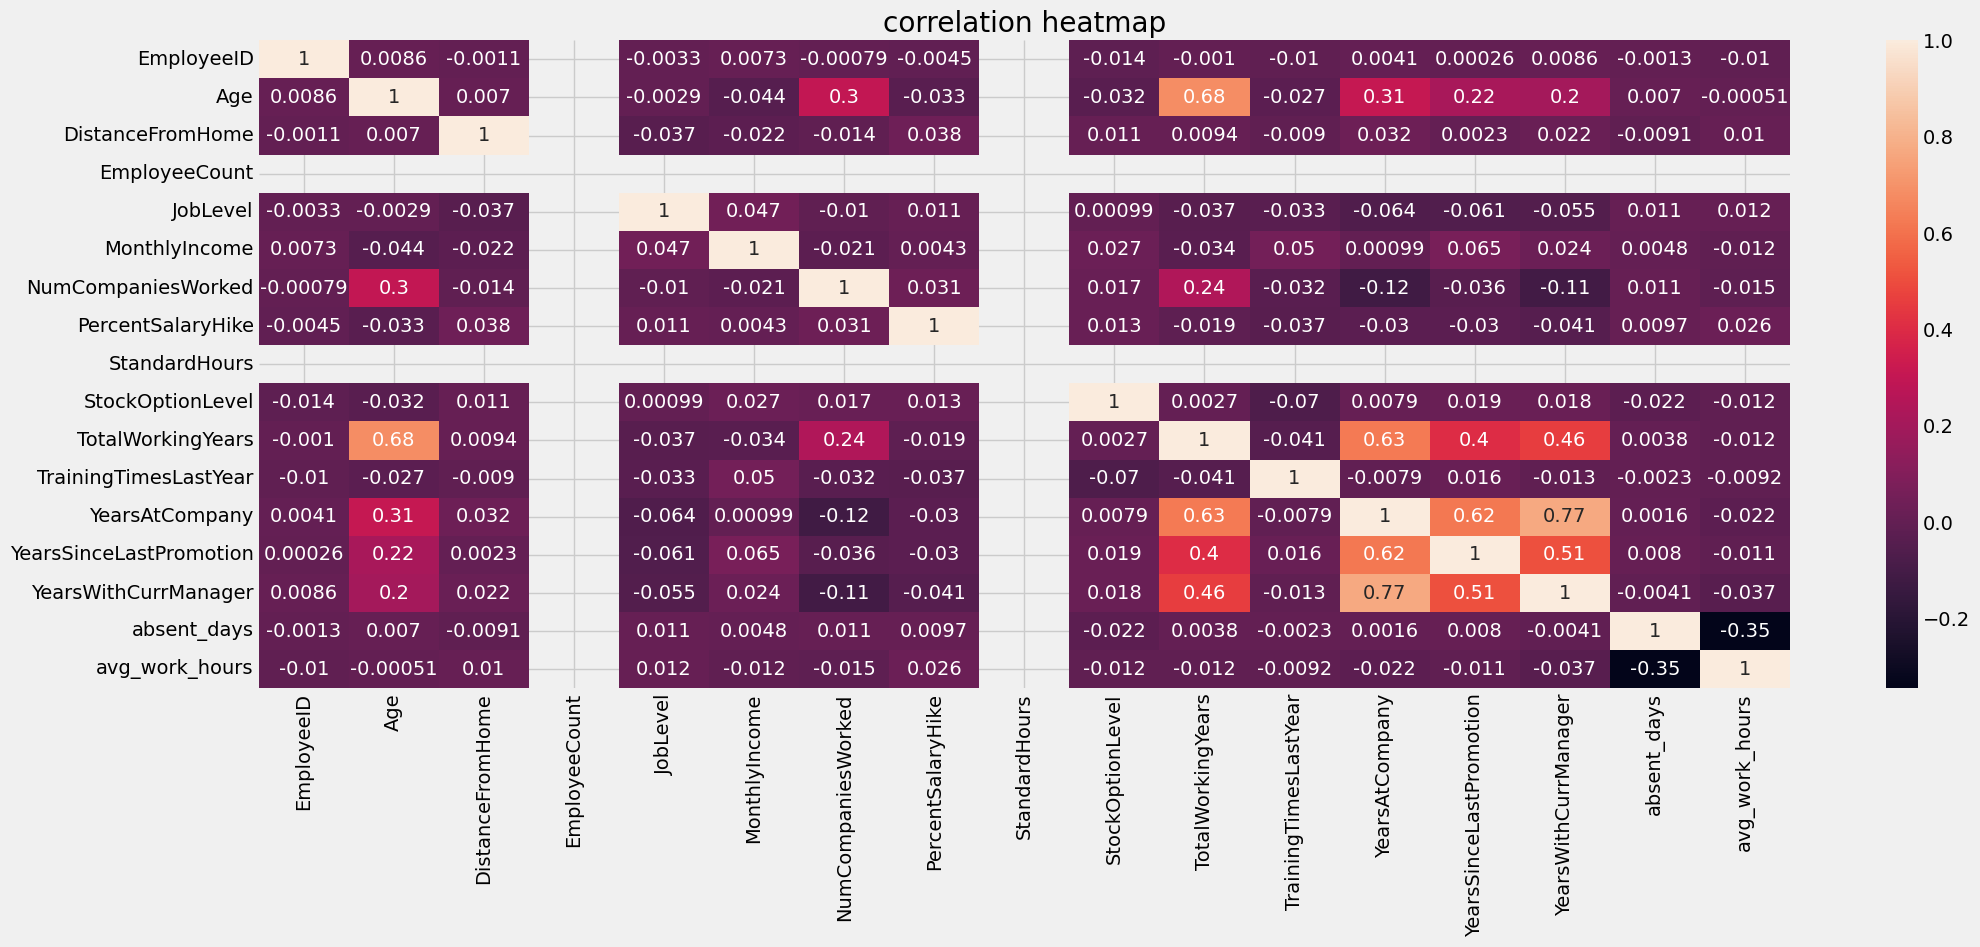

In [32]:
## Correlation plot
hr_EmAtRate_n.figure(figsize=(22, 8))
hr_EmAtRate_n.title("correlation heatmap")
hr_EmAtRate_s.heatmap(hr_EmAtRate.corr(), annot=True)

### Uni-Variate Analysis

Attrition Analysis Company Wide
percentage of Attrition is: 16.122448979591837 %
percentage of no Attrition is: 83.87755102040816 %


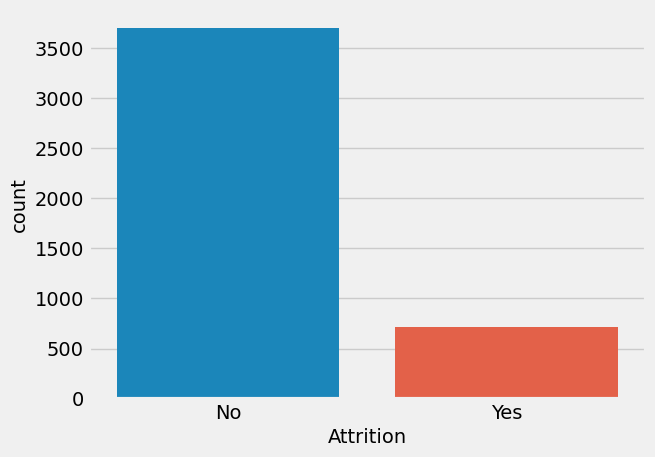

In [33]:
print('Attrition Analysis Company Wide')
print("percentage of Attrition is:",(len(hr_EmAtRate[hr_EmAtRate['Attrition']=='Yes'])/len(hr_EmAtRate))*100,"%")
print("percentage of no Attrition is:",(len(hr_EmAtRate[hr_EmAtRate['Attrition']=='No'])/len(hr_EmAtRate))*100,"%")
hr_EmAtRate_s.countplot(x = "Attrition",data=hr_EmAtRate)
hr_EmAtRate_n.show()

In [34]:
hr_EmAtRate['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

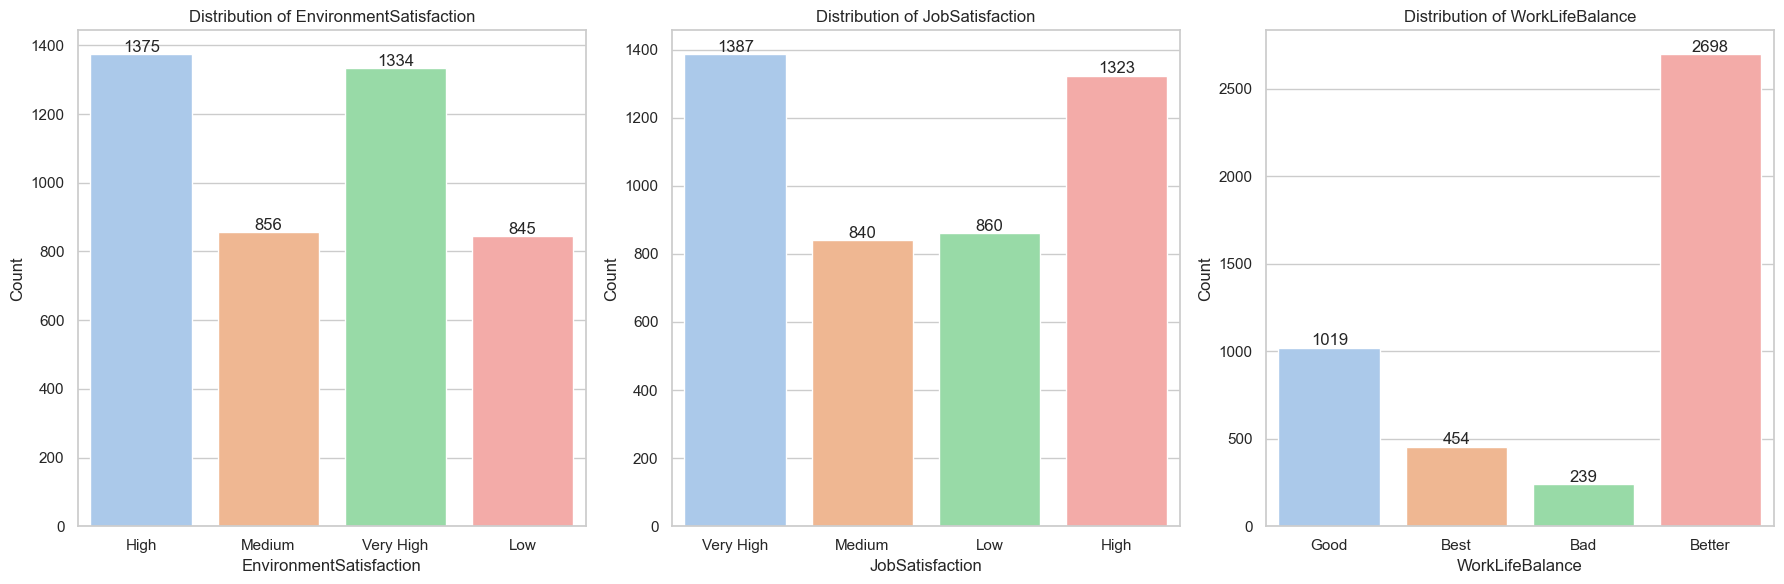

In [35]:
# Set the style to use seaborn theme
hr_EmAtRate_s.set(style="whitegrid")

# Create subplots
fig, axes = hr_EmAtRate_n.subplots(1, 3, figsize=(18, 6))

# List of variables
variables = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

# Colors for the plots
colors = hr_EmAtRate_s.color_palette("pastel")

# Create count plots for each variable
for i, var in enumerate(variables):
    ax = hr_EmAtRate_s.countplot(x=var, data=hr_EmAtRate, palette=colors, ax=axes[i])
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {var}')

    # Display counts on the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

hr_EmAtRate_n.tight_layout()
hr_EmAtRate_n.show()

From the above plots, It is clearly seen that there is higher attrition in the Human Resources department.<br>
Employees whose job role is Research Director are most likely to leave the company.<br>
The employees whose job involvement is Low has highest Attrition.

### Bi-Variate Analysis
To find the how the dependent variable **Attrition** is related with the independent variables. <br>
In this analysis, the visualization is done mainly on the **percentage of Attrition** which is calculated percentage of employees who are leaving the company <br> [(( Number_of_emp leaving/Total Employee)*100)]

In [36]:
# Group the data by 'WorkLifeBalance' and calculate the attrition rate
attrition_rate_by_worklife = hr_EmAtRate.groupby('WorkLifeBalance')['Attrition'].value_counts(normalize=True).unstack()

# Extract the attrition rate for 'Yes' (employees who left) and rename the column
attrition_rate_by_worklife = attrition_rate_by_worklife.rename(columns={'Yes': 'Attrition'})
print(attrition_rate_by_worklife)

# Reset index to convert 'WorkLifeBalance' to a column
attrition_rate_by_worklife = attrition_rate_by_worklife.reset_index()

# Create an interactive bar plot using Plotly
fig = hr_EmAtRate_p.bar(attrition_rate_by_worklife, x='WorkLifeBalance', y='Attrition',
             color='Attrition', color_continuous_scale='Blues',
             labels={'WorkLifeBalance': 'Work Life Balance', 'Attrition': 'Attrition'},
             title='Attrition by Work Life Balance',
             template='plotly_white')

# Show the plot
fig.show()


Attrition              No  Attrition
WorkLifeBalance                     
Bad              0.686192   0.313808
Best             0.821586   0.178414
Better           0.857672   0.142328
Good             0.832188   0.167812


In [37]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named 'df' containing the Employee dataset

# Define age groups (you can adjust the bins as needed)
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '60+']

# Create a new column 'AgeGroup' based on age bins
hr_EmAtRate['AgeGroup'] = pd.cut(hr_EmAtRate['Age'], bins=age_bins, labels=age_labels, right=False)

# Group the data by 'AgeGroup' and calculate the attrition rate
attrition_rate_by_age = hr_EmAtRate.groupby('AgeGroup')['Attrition'].value_counts(normalize=True).unstack()

# Extract the attrition rate for 'Yes' (employees who left) and rename the column
attrition_rate_by_age = attrition_rate_by_age.rename(columns={'Yes': 'AttritionRate'})

# Reset index to convert 'AgeGroup' to a column
attrition_rate_by_age = attrition_rate_by_age.reset_index()

# Create an interactive bar plot using Plotly
fig = px.bar(attrition_rate_by_age, x='AgeGroup', y='AttritionRate',
             color='AttritionRate', color_continuous_scale='Blues',
             labels={'AgeGroup': 'Age Group', 'AttritionRate': 'Attrition Rate'},
             title='Attrition Rate by Age Group',
             template='plotly_white')

# Show the plot
fig.show()
hr_EmAtRate.drop(['AgeGroup'],axis=1,inplace=True)

In [38]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named 'df' containing the Employee dataset

# Group the data by 'EnvironmentSatisfaction' and calculate the attrition rate
attrition_rate_by_env_satisfaction = hr_EmAtRate.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack()

# Extract the attrition rate for 'Yes' (employees who left) and rename the column
attrition_rate_by_env_satisfaction = attrition_rate_by_env_satisfaction.rename(columns={'Yes': 'AttritionRate'})

# Reset index to convert 'EnvironmentSatisfaction' to a column
attrition_rate_by_env_satisfaction = attrition_rate_by_env_satisfaction.reset_index()

# Create an interactive bar plot using Plotly
fig = px.bar(attrition_rate_by_env_satisfaction, x='EnvironmentSatisfaction', y='AttritionRate',
             color='AttritionRate', color_continuous_scale='Blues',
             labels={'EnvironmentSatisfaction': 'Environment Satisfaction', 'AttritionRate': 'Attrition Rate'},
             title='Attrition Rate by Environment Satisfaction',
             template='plotly_white')

# Show the plot
fig.show()

In [39]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame named 'df' containing the Employee dataset

# Group the data by 'EnvironmentSatisfaction' and calculate the attrition rate
attrition_rate_by_env_satisfaction = hr_EmAtRate.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack()

# Extract the attrition rate for 'Yes' (employees who left) and rename the column
attrition_rate_by_env_satisfaction = attrition_rate_by_env_satisfaction.rename(columns={'Yes': 'AttritionRate'})

# Reset index to convert 'EnvironmentSatisfaction' to a column
attrition_rate_by_env_satisfaction = attrition_rate_by_env_satisfaction.reset_index()

# Create an interactive bar plot using Plotly
fig = px.bar(attrition_rate_by_env_satisfaction, x='EnvironmentSatisfaction', y='AttritionRate',
             color='AttritionRate', color_continuous_scale='Blues',
             labels={'EnvironmentSatisfaction': 'Environment Satisfaction', 'AttritionRate': 'Attrition Rate'},
             title='Attrition Rate by Environment Satisfaction',
             template='plotly_white')

# Show the plot
fig.show()

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Attrition'),
 Text(0.5, 1.0, 'Box plot- Age with Attrition')]

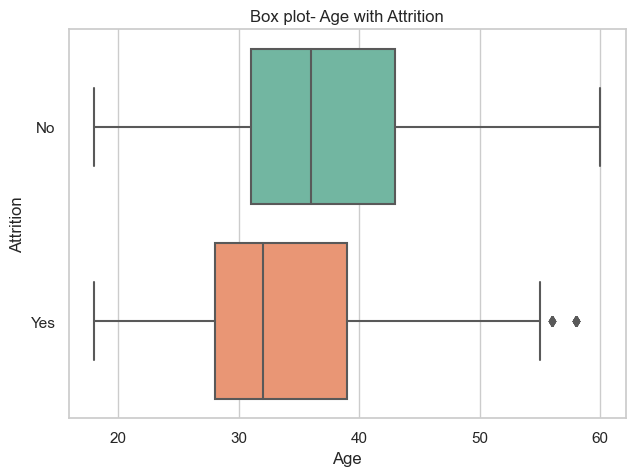

In [40]:
llk = hr_EmAtRate_s.boxplot(x ="Age", y ="Attrition", data = hr_EmAtRate, palette = "Set2")

llk.set(xlabel ="Age", ylabel = "Attrition", title ='Box plot- Age with Attrition')

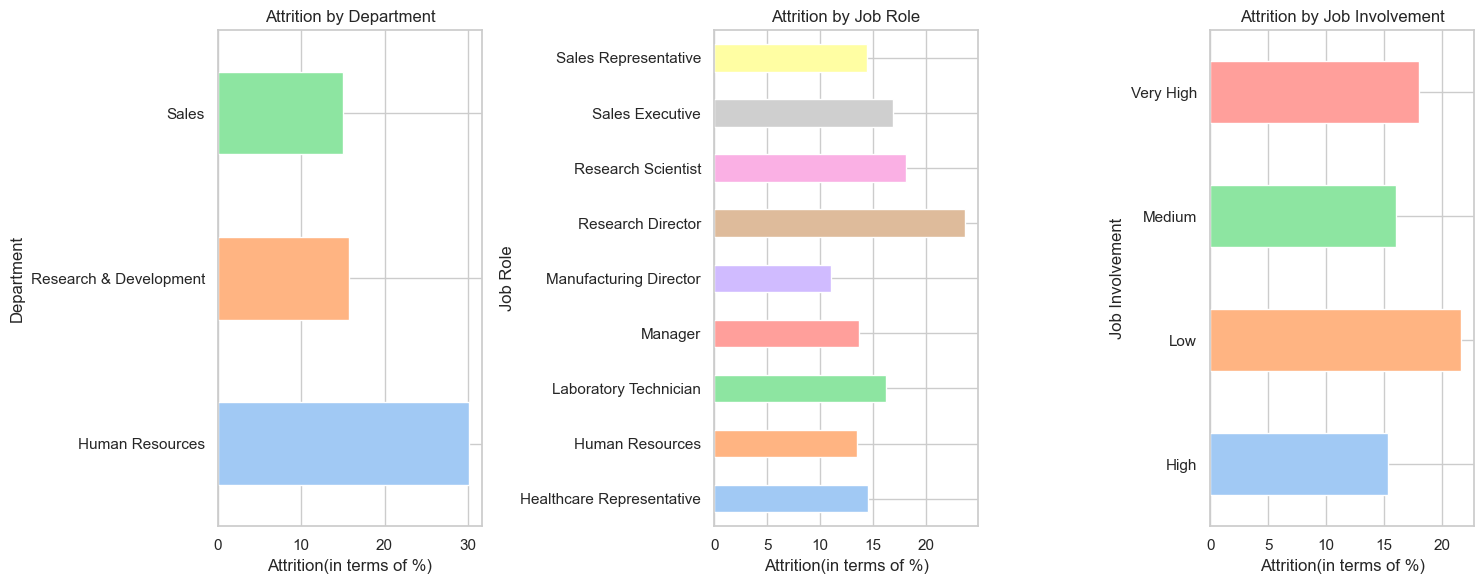

In [41]:
# Group the data by 'Department' and 'Attrition' and calculate the attrition rate
attrition_rate_by_department = hr_EmAtRate.groupby('Department')['Attrition'].value_counts(normalize=True).unstack()

# Calculate the attrition percentage and round it to 2 decimal places
attrition_percentage_by_department = attrition_rate_by_department['Yes'] * 100
attrition_percentage_by_department = attrition_percentage_by_department.round(2)

# Group the data by 'JobRole' and 'Attrition' and calculate the attrition rate
attrition_rate_by_jobrole = hr_EmAtRate.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()

# Calculate the attrition percentage and round it to 2 decimal places
attrition_percentage_by_jobrole = attrition_rate_by_jobrole['Yes'] * 100
attrition_percentage_by_jobrole = attrition_percentage_by_jobrole.round(2)

# Group the data by 'JobInvolvement' and 'Attrition' and calculate the attrition rate
attrition_rate_by_jobinvolvement = hr_EmAtRate.groupby('JobInvolvement')['Attrition'].value_counts(normalize=True).unstack()

# Calculate the attrition percentage and round it to 2 decimal places
attrition_percentage_by_jobinvolvement = attrition_rate_by_jobinvolvement['Yes'] * 100
attrition_percentage_by_jobinvolvement = attrition_percentage_by_jobinvolvement.round(2)

# Set a custom color palette
colors = hr_EmAtRate_s.color_palette('pastel')

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = hr_EmAtRate_n.subplots(1, 3, figsize=(15, 6))

# Create the first subplot for Department-wise attrition percentage
attrition_percentage_by_department.plot(kind='barh', color=colors, ax=ax1)
ax1.set_xlabel('Attrition(in terms of %)')
ax1.set_ylabel('Department')
ax1.set_title('Attrition by Department')

# Create the second subplot for JobRole-wise attrition percentage
attrition_percentage_by_jobrole.plot(kind='barh', color=colors, ax=ax2)
ax2.set_xlabel('Attrition(in terms of %)')
ax2.set_ylabel('Job Role')
ax2.set_title('Attrition by Job Role')

# Create the third subplot for JobInvolvement-wise attrition percentage
attrition_percentage_by_jobinvolvement.plot(kind='barh', color=colors, ax=ax3)
ax3.set_xlabel('Attrition(in terms of %)')
ax3.set_ylabel('Job Involvement')
ax3.set_title('Attrition by Job Involvement')

# Adjust layout to prevent overlap of subplots
hr_EmAtRate_n.tight_layout()

# Show the plot
hr_EmAtRate_n.show()


[Text(0.5, 0, 'hours'), Text(0.5, 1.0, 'Average working hours')]

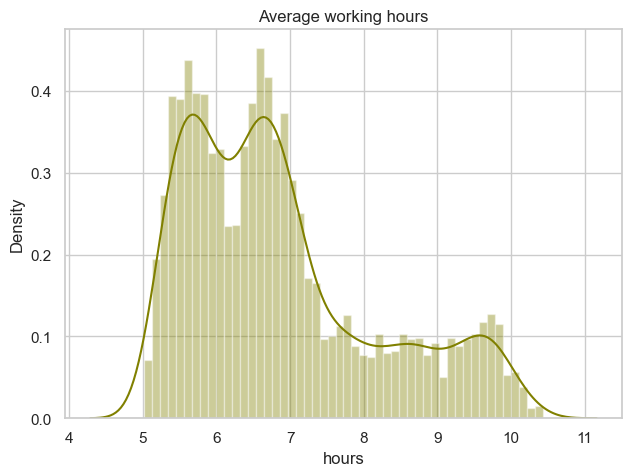

In [42]:
llk = hr_EmAtRate_s.distplot(hr_EmAtRate['avg_work_hours'], color ='olive', bins = 50)
llk.set(xlabel ="hours", title ='Average working hours')

From this density plot, It can be seen that the Average working hours of an employee lies in 4-11 hours

[Text(0.5, 0, 'avg_work_hours'),
 Text(0, 0.5, 'Attrition'),
 Text(0.5, 1.0, 'Box plot- avg_work_hours with Attrition')]

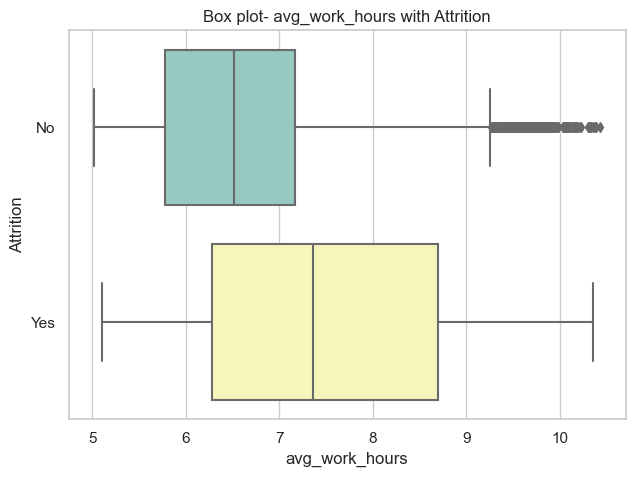

In [43]:
llk = hr_EmAtRate_s.boxplot(x ="avg_work_hours", y ="Attrition", data = hr_EmAtRate, palette = "Set3")

llk.set(xlabel ="avg_work_hours", ylabel = "Attrition", title ='Box plot- avg_work_hours with Attrition')

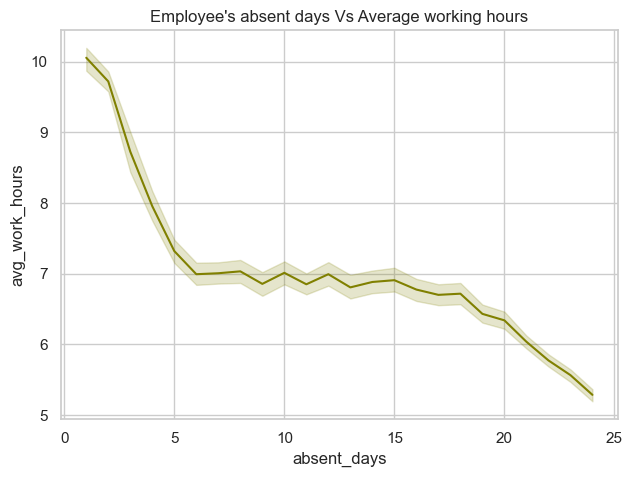

In [44]:
hr_EmAtRate_s.lineplot(x="absent_days", y="avg_work_hours", data=hr_EmAtRate, color='olive')
hr_EmAtRate_n.title("Employee's absent days Vs Average working hours")
hr_EmAtRate_n.show()

[Text(0, 0.5, 'absent_days'),
 Text(0.5, 0, 'Attrition'),
 Text(0.5, 1.0, 'Box plot- Num of days absent with Attrition details')]

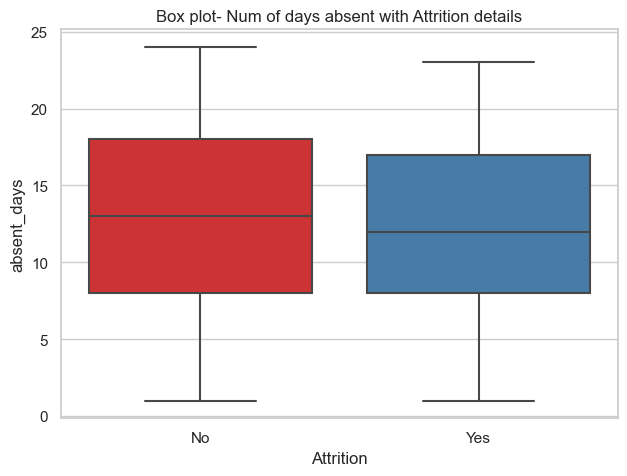

In [45]:
llk = hr_EmAtRate_s.boxplot(y ="absent_days", x ="Attrition", data = hr_EmAtRate, palette = "Set1")

llk.set(ylabel ="absent_days", xlabel = "Attrition", title ='Box plot- Num of days absent with Attrition details')

Employees resigned from company those who have taken less leaves compared to others.

In [46]:
## Removing the EmployeeID column
hr_EmAtRate.drop(['EmployeeID'],axis=1,inplace=True)

### Checking for outliers

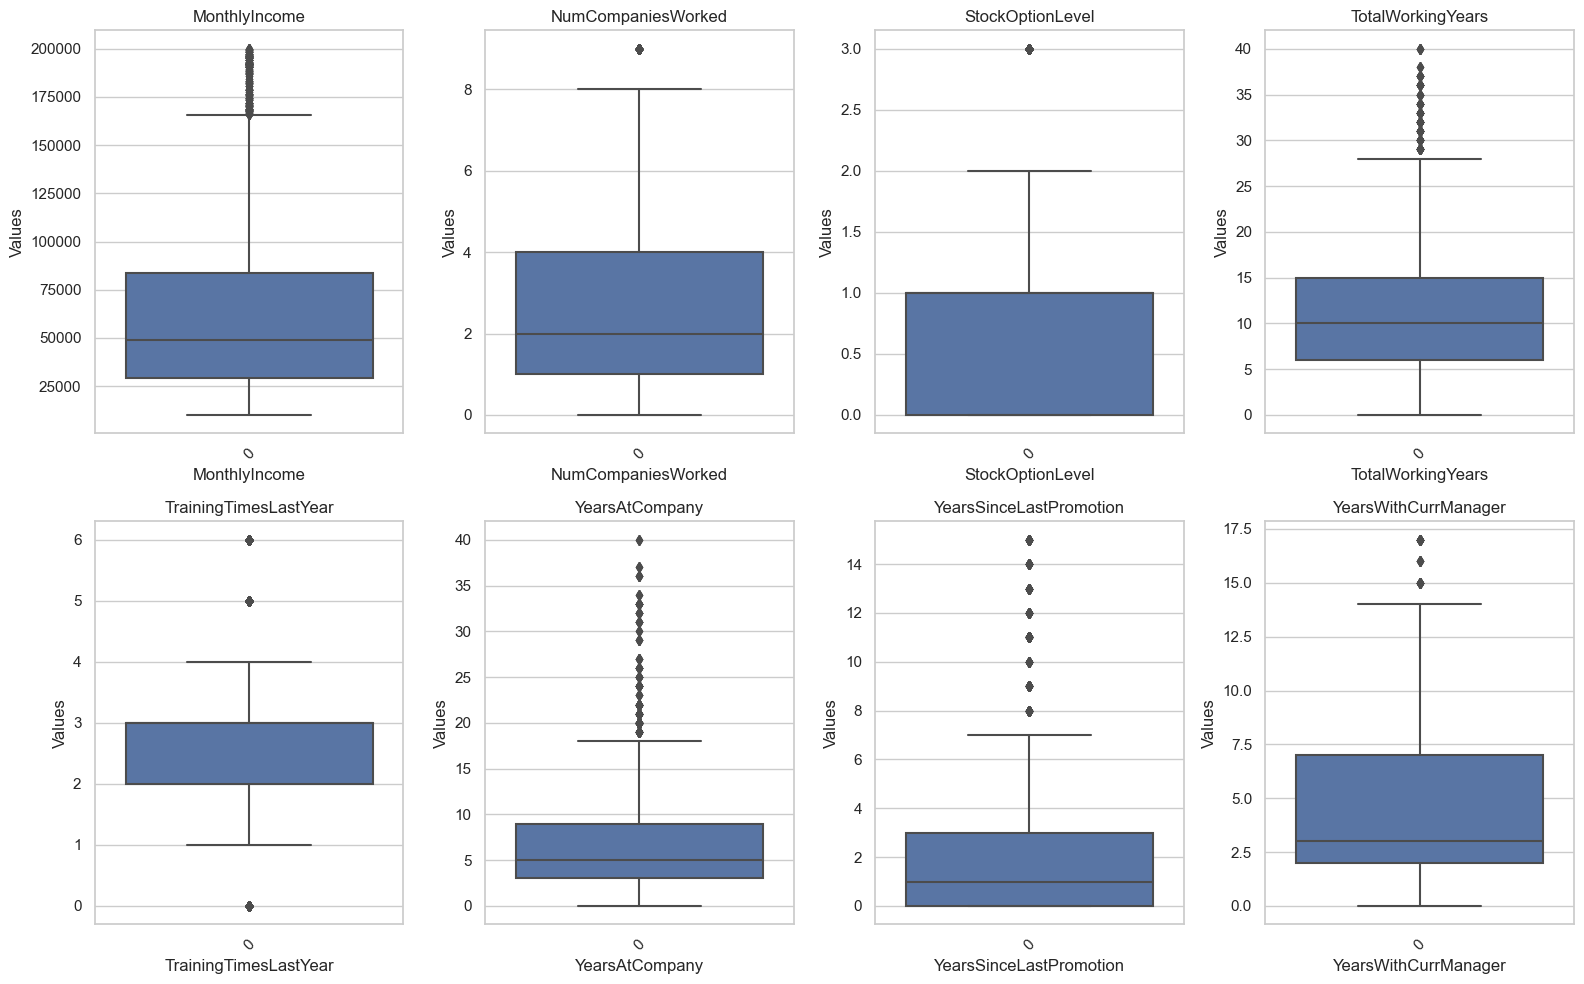

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select the columns for which you want to check outliers
columns = ['MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears',
           'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
plt.subplots_adjust(hspace=0.5)

# Iterate through columns and create box plots
for i, column in enumerate(columns):
    row = i // 4
    col = i % 4
    sns.boxplot(data=hr_EmAtRate[column], ax=axes[row, col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Values')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [48]:
import numpy as np
columns = ['MonthlyIncome', 'NumCompaniesWorked', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
           'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
hr_EmAtRate[columns] = (hr_EmAtRate[columns] + 1).transform(np.log)

In [49]:
hr_EmAtRate.to_csv('final_hr_EmAtRate.csv', index=False)
hr_EmAtRate

JobInvolvement PerformanceRating EnvironmentSatisfaction JobSatisfaction  \
0              High         Excellent                    High       Very High   
1            Medium       Outstanding                    High          Medium   
2              High         Excellent                  Medium          Medium   
3            Medium         Excellent               Very High       Very High   
4              High         Excellent               Very High             Low   
...             ...               ...                     ...             ...   
4405           High         Excellent               Very High             Low   
4406         Medium         Excellent               Very High       Very High   
4407           High       Outstanding                     Low            High   
4408         Medium         Excellent               Very High             Low   
4409      Very High         Excellent                     Low            High   

     WorkLifeBalance  Age Attrition     BusinessTravel  \
0               Good   51        No      Travel_Rarely   
1               Best   31       Yes  Travel_Frequently   
2                Bad   32        No  Travel_Frequently   
3             Better   38        No         Non-Travel   
4             Better   32        No      Travel_Rarely   
...              ...  ...       ...                ...   
4405          Better   42        No      Travel_Rarely   
4406          Better   29        No      Travel_Rarely   
4407          Better   25        No      Travel_Rarely   
4408          Better   42        No      Travel_Rarely   
4409          Better   40        No      Travel_Rarely   

                  Department  DistanceFromHome  ... PercentSalaryHike  \
0                      Sales                 6  ...                11   
1     Research & Development                10  ...                23   
2     Research & Development                17  ...                15   
3     Research & Development                 2  ...                11   
4     Research & Development                10  ...                12   
...                      ...               ...  ...               ...   
4405  Research & Development                 5  ...                17   
4406  Research & Development                 2  ...                15   
4407  Research & Development                25  ...                20   
4408                   Sales                18  ...                14   
4409  Research & Development                28  ...                12   

     StandardHours  StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                8          0.000000          0.693147               1.945910   
1                8          0.693147          1.945910               1.386294   
2                8          1.386294          1.791759               1.098612   
3                8          1.386294          2.639057               1.791759   
4                8          1.098612          2.302585               1.098612   
...            ...               ...               ...                    ...   
4405             8          0.693147          2.397895               1.791759   
4406             8          0.000000          2.397895               1.098612   
4407             8          0.000000          1.791759               1.609438   
4408             8          0.693147          2.397895               1.098612   
4409             8          0.000000          2.484907               1.945910   

     YearsAtCompany YearsSinceLastPromotion  YearsWithCurrManager  \
0          0.693147                0.000000              0.000000   
1          1.791759                0.693147              1.609438   
2          1.791759                0.000000              1.386294   
3          2.197225                2.079442              1.791759   
4          1.945910                0.000000              1.609438   
...             ...                     ...                   ...   
44

### Feature Selection

In [50]:
import pandas as hr_ana_EmAtRate_pna

GEN_hr_ana_EmAtRate = hr_ana_EmAtRate_pna.read_csv("final_hr_EmAtRate.csv")
GEN_hr_ana_EmAtRate.shape

(4410, 30)

In [51]:
GEN_hr_ana_EmAtRate.head(4)

JobInvolvement PerformanceRating EnvironmentSatisfaction JobSatisfaction  \
0           High         Excellent                    High       Very High   
1         Medium       Outstanding                    High          Medium   
2           High         Excellent                  Medium          Medium   
3         Medium         Excellent               Very High       Very High   

  WorkLifeBalance  Age Attrition     BusinessTravel              Department  \
0            Good   51        No      Travel_Rarely                   Sales   
1            Best   31       Yes  Travel_Frequently  Research & Development   
2             Bad   32        No  Travel_Frequently  Research & Development   
3          Better   38        No         Non-Travel  Research & Development   

   DistanceFromHome  ... PercentSalaryHike StandardHours  StockOptionLevel  \
0                 6  ...                11             8          0.000000   
1                10  ...                23             8          0.693147   
2                17  ...                15             8          1.386294   
3                 2  ...                11             8          1.386294   

  TotalWorkingYears  TrainingTimesLastYear YearsAtCompany  \
0          0.693147               1.945910       0.693147   
1          1.945910               1.386294       1.791759   
2          1.791759               1.098612       1.791759   
3          2.639057               1.791759       2.197225   

  YearsSinceLastPromotion  YearsWithCurrManager  absent_days avg_work_hours  
0                0.000000              0.000000           17           6.48  
1                0.693147              1.609438           13           6.82  
2                0.000000              1.386294            7           6.30  
3                2.079442              1.791759           14           6.39  

[4 rows x 30 columns]

In [52]:
Emp_data = GEN_hr_ana_EmAtRate
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'Emp_data' is your DataFrame
categorical_columns = Emp_data.select_dtypes(include=['object']).columns

# Create an empty DataFrame to store the results
chi2_matrix = pd.DataFrame(index=categorical_columns, columns=['Chi-square statistic', 'P-value'])

for cat_column in categorical_columns:
    contingency_table = pd.crosstab(Emp_data[cat_column], Emp_data['Attrition'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_matrix.loc[cat_column, 'Chi-square statistic'] = chi2
    chi2_matrix.loc[cat_column, 'P-value'] = p

# Display the chi2_matrix
print(chi2_matrix)

                        Chi-square statistic   P-value
JobInvolvement                       8.13911  0.043223
PerformanceRating                    2.24216  0.134293
EnvironmentSatisfaction            64.711982       0.0
JobSatisfaction                    53.173475       0.0
WorkLifeBalance                    49.589847       0.0
Attrition                        4402.608354       0.0
BusinessTravel                     72.547241       0.0
Department                         29.090275       0.0
Education                           5.641148  0.227598
EducationField                     46.194921       0.0
Gender                              1.349904  0.245295
JobRole                            25.116314  0.001486
MaritalStatus                      138.49103       0.0
Over18                                   0.0       1.0


In [53]:
from sklearn import preprocessing as GEN_hr_ana_EmAtRatepo
GEN_hr_ana_EmAtRatepo_p = GEN_hr_ana_EmAtRatepo.LabelEncoder()
GEN_hr_ana_EmAtRate = GEN_hr_ana_EmAtRate.apply(GEN_hr_ana_EmAtRatepo_p.fit_transform)
GEN_hr_ana_EmAtRate

JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0                  0                  0                        0   
1                  2                  1                        0   
2                  0                  0                        2   
3                  2                  0                        3   
4                  0                  0                        3   
...              ...                ...                      ...   
4405               0                  0                        3   
4406               2                  0                        3   
4407               0                  1                        1   
4408               2                  0                        3   
4409               3                  0                        1   

      JobSatisfaction  WorkLifeBalance  Age  Attrition  BusinessTravel  \
0                   3                3   33          0               2   
1                   2                1   13          1               1   
2                   2                0   14          0               1   
3                   3                2   20          0               0   
4                   1                2   14          0               2   
...               ...              ...  ...        ...             ...   
4405                1                2   24          0               2   
4406                3                2   11          0               2   
4407                0                2    7          0               2   
4408                1                2   24          0               2   
4409                0                2   22          0               2   

      Department  DistanceFromHome  ...  PercentSalaryHike  StandardHours  \
0              2                 5  ...                  0              0   
1              1                 9  ...                 12              0   
2              1                16  ...                  4              0   
3              1                 1  ...                  0              0   
4              1                 9  ...                  1              0   
...          ...               ...  ...                ...            ...   
4405           1                 4  ...                  6              0   
4406           1                 1  ...                  4              0   
4407           1                24  ...                  9              0   
4408           2                17  ...                  3              0   
4409           1                27  ...                  1              0   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  1                      6   
1                    1                  6                      3   
2                    3                  5                      2   
3                    3                 13                      5   
4                    2                  9                      2   
...                ...                ...                    ...   
4405                 1                 10                      5   
4406                 0                 10                      2   
4407                 0                  5                      4   
4408                 1                 10                      2   
4409                 0                 11                      6   

      YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
0                  1                        0                     0   
1                  5                        1                     4   
2                  5                        0                     3   
3                  8                        7                     5   
4                  6                        0                     4   
...              ...                      ...                   ...   
4405               3                        0                

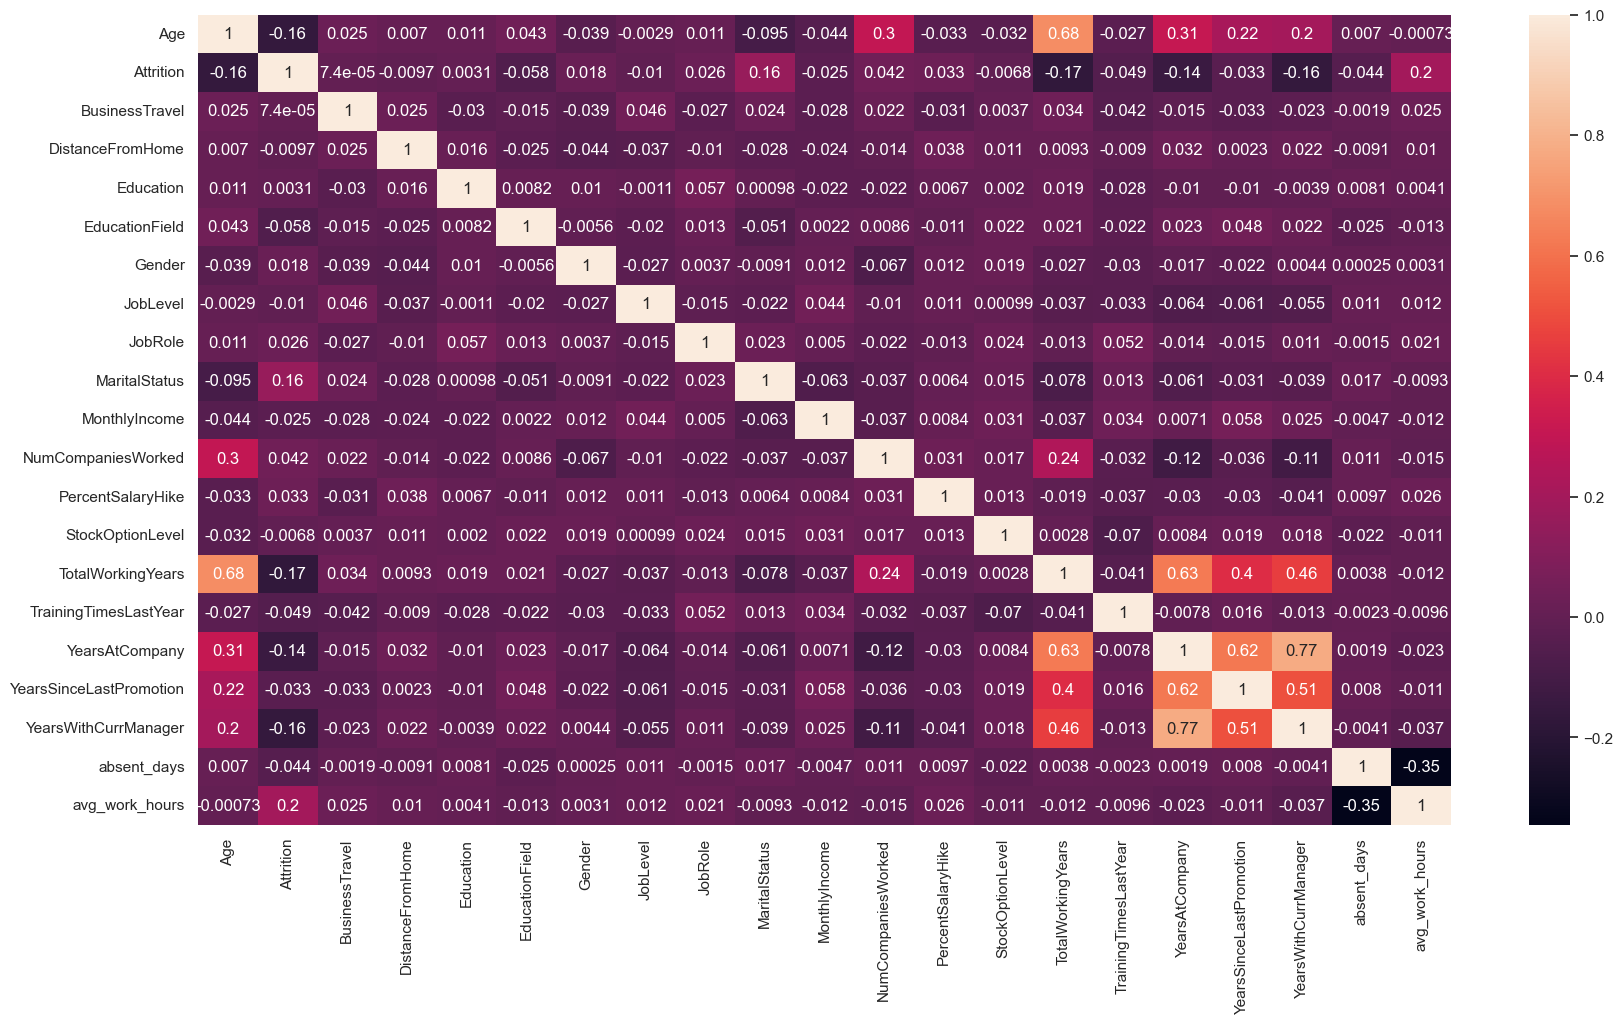

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
num_cols = GEN_hr_ana_EmAtRate[['Age','Attrition','BusinessTravel','DistanceFromHome','Education', 'EducationField','Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','absent_days','avg_work_hours']]

corr_mat = num_cols.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_mat, annot = True)
plt.show()


In [55]:
GEN_hr_ana_EmAtRate_idp = GEN_hr_ana_EmAtRate.drop('Attrition',axis=1) # independent variables
GEN_hr_ana_EmAtRate_dp = GEN_hr_ana_EmAtRate['Attrition'] # dependent variables


In [56]:
### Remove Multicollinearity variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor as GEN_hr_ana_EmAtRatevif

GEN_hr_ana_VIF = hr_ana_EmAtRate_pna.DataFrame()
GEN_hr_ana_VIF["Column"] = GEN_hr_ana_EmAtRate_idp.columns

"""get VIF score for each column"""
GEN_hr_ana_VIF["SCR_VIF"] = [GEN_hr_ana_EmAtRatevif(GEN_hr_ana_EmAtRate_idp.values, u)
                          for u in range(len(GEN_hr_ana_EmAtRate_idp.columns))]
GEN_hr_ana_VIF

Column    SCR_VIF
0            JobInvolvement   1.617308
1         PerformanceRating   2.962974
2   EnvironmentSatisfaction   2.470253
3           JobSatisfaction   2.516990
4           WorkLifeBalance   7.601497
5                       Age  10.226953
6            BusinessTravel   6.291384
7                Department   6.146847
8          DistanceFromHome   2.005479
9                 Education   2.040869
10           EducationField   3.703646
11            EmployeeCount        NaN
12                   Gender   2.448494
13                 JobLevel   1.929938
14                  JobRole   4.185510
15            MaritalStatus   3.134388
16            MonthlyIncome   3.674337
17       NumCompaniesWorked   2.658120
18                   Over18        NaN
19        PercentSalaryHike   5.678561
20            StandardHours        NaN
21         StockOptionLevel   1.880281
22        TotalWorkingYears   9.565238
23    TrainingTimesLastYear   5.329267
24           YearsAtCompany   9.392214
25  YearsSinceLastPromotion   2.411805
26     YearsWithCurrManager   5.901202
27              absent_days   5.579792
28           avg_work_hours   3.183020

In [57]:
GEN_hr_ana_EmAtRate= GEN_hr_ana_EmAtRate[['JobInvolvement','PerformanceRating','EnvironmentSatisfaction','JobSatisfaction','DistanceFromHome','Education','EducationField',
                                          'EmployeeCount','Gender','JobLevel','JobRole','MaritalStatus','MonthlyIncome','NumCompaniesWorked','Over18','StandardHours',
                                          'StockOptionLevel','YearsSinceLastPromotion','avg_work_hours', 'Attrition']]
GEN_hr_ana_EmAtRate

JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0                  0                  0                        0   
1                  2                  1                        0   
2                  0                  0                        2   
3                  2                  0                        3   
4                  0                  0                        3   
...              ...                ...                      ...   
4405               0                  0                        3   
4406               2                  0                        3   
4407               0                  1                        1   
4408               2                  0                        3   
4409               3                  0                        1   

      JobSatisfaction  DistanceFromHome  Education  EducationField  \
0                   3                 5          2               1   
1                   2                 9          1               1   
2                   2                16          4               4   
3                   3                 1          3               1   
4                   1                 9          1               3   
...               ...               ...        ...             ...   
4405                1                 4          4               3   
4406                3                 1          4               3   
4407                0                24          2               1   
4408                1                17          2               3   
4409                0                27          0               3   

      EmployeeCount  Gender  JobLevel  JobRole  MaritalStatus  MonthlyIncome  \
0                 0       0         0        0              1           1166   
1                 0       0         0        6              2            505   
2                 0       1         3        7              1           1318   
3                 0       1         2        1              1            984   
4                 0       1         0        7              2            145   
...             ...     ...       ...      ...            ...            ...   
4405              0       0         0        6              2            810   
4406              0       1         0        2              0            240   
4407              0       1         1        7              1            434   
4408              0       1         0        2              0            164   
4409              0       1         1        2              0            744   

      NumCompaniesWorked  Over18  StandardHours  StockOptionLevel  \
0                      1       0              0                 0   
1                      0       0              0                 1   
2                      1       0              0                 3   
3                      3       0              0                 3   
4                      4       0              0                 2   
...                  ...     ...            ...               ...   
4405                   3       0              0                 1   
4406                   2       0              0                 0   
4407                   0       0              0                 0   
4408                   0       0              0                 1   
4409                   0       0              0                 0   

      YearsSinceLastPromotion  avg_work_hours  Attrition  
0                           0             145          0  
1                           1             179          1  
2                           0             127          0  
3                           7             136          0  
4                           0             231          0  
...                       ...             ...        ...  
4405                        0             280          0  
4406                        0              47          0  
4407                       

In [58]:
GEN_hr_ana_EmAtRate.to_csv('best_Fea_GEN_hr_ana_EmAtRate.csv', index=False)

In [59]:
import pandas as hr_ana_EmAtRate_pna

GEN_hr_ana_EmAtRate = hr_ana_EmAtRate_pna.read_csv("best_Fea_GEN_hr_ana_EmAtRate.csv")
GEN_hr_ana_EmAtRate.shape

(4410, 20)

In [60]:
GEN_hr_ana_EmAtRate_idp = GEN_hr_ana_EmAtRate.drop('Attrition',axis=1) # independent variables
GEN_hr_ana_EmAtRate_idp


JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0                  0                  0                        0   
1                  2                  1                        0   
2                  0                  0                        2   
3                  2                  0                        3   
4                  0                  0                        3   
...              ...                ...                      ...   
4405               0                  0                        3   
4406               2                  0                        3   
4407               0                  1                        1   
4408               2                  0                        3   
4409               3                  0                        1   

      JobSatisfaction  DistanceFromHome  Education  EducationField  \
0                   3                 5          2               1   
1                   2                 9          1               1   
2                   2                16          4               4   
3                   3                 1          3               1   
4                   1                 9          1               3   
...               ...               ...        ...             ...   
4405                1                 4          4               3   
4406                3                 1          4               3   
4407                0                24          2               1   
4408                1                17          2               3   
4409                0                27          0               3   

      EmployeeCount  Gender  JobLevel  JobRole  MaritalStatus  MonthlyIncome  \
0                 0       0         0        0              1           1166   
1                 0       0         0        6              2            505   
2                 0       1         3        7              1           1318   
3                 0       1         2        1              1            984   
4                 0       1         0        7              2            145   
...             ...     ...       ...      ...            ...            ...   
4405              0       0         0        6              2            810   
4406              0       1         0        2              0            240   
4407              0       1         1        7              1            434   
4408              0       1         0        2              0            164   
4409              0       1         1        2              0            744   

      NumCompaniesWorked  Over18  StandardHours  StockOptionLevel  \
0                      1       0              0                 0   
1                      0       0              0                 1   
2                      1       0              0                 3   
3                      3       0              0                 3   
4                      4       0              0                 2   
...                  ...     ...            ...               ...   
4405                   3       0              0                 1   
4406                   2       0              0                 0   
4407                   0       0              0                 0   
4408                   0       0              0                 1   
4409                   0       0              0                 0   

      YearsSinceLastPromotion  avg_work_hours  
0                           0             145  
1                           1             179  
2                           0             127  
3                           7             136  
4                           0             231  
...                       ...             ...  
4405                        0             280  
4406                        0              47  
4407                        1             166  
4408                        7             365  
4409                        3 

In [61]:
GEN_hr_ana_EmAtRate_dp = GEN_hr_ana_EmAtRate['Attrition'] # dependent variables
GEN_hr_ana_EmAtRate_dp

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: Attrition, Length: 4410, dtype: int64

In [62]:
GEN_hr_ana_EmAtRate['Attrition'].value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split as GEN_hr_ana_EmAtRatepit

sh_GEN_hr_ana_EmAtRate = 0.70  # 70% for training, 30% for testing
rt_GEN_hr_ana_EmAtRate = 15

GEN_hr_idp_train, GEN_hr_idp_test, GEN_hr_dp_train, GEN_hr_dp_test = GEN_hr_ana_EmAtRatepit(
    GEN_hr_ana_EmAtRate_idp, GEN_hr_ana_EmAtRate_dp,
    test_size=1 - sh_GEN_hr_ana_EmAtRate, random_state=rt_GEN_hr_ana_EmAtRate
)


In [64]:
print("Shape of training input:", GEN_hr_idp_train.shape)
print("Shape of training target:", GEN_hr_dp_train.shape)
print("Shape of testing input:", GEN_hr_idp_test.shape)
print("Shape of testing target:", GEN_hr_dp_test.shape)

Shape of training input: (3086, 19)
Shape of training target: (3086,)
Shape of testing input: (1324, 19)
Shape of testing target: (1324,)


**Oversampling the training data**

In [65]:
from imblearn.over_sampling import SMOTE

desired_ratio = 0.5  # Ratio of minority class to majority class
random_seed = 42    # Set your desired random seed
smote = SMOTE(sampling_strategy=desired_ratio, random_state=random_seed)

GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled = smote.fit_resample(GEN_hr_idp_train, GEN_hr_dp_train)

print("Shape of oversampled training input:", GEN_hr_idp_train_oversampled.shape)
print("Shape of oversampled training target:", GEN_hr_dp_train_oversampled.shape)


Shape of oversampled training input: (3894, 19)
Shape of oversampled training target: (3894,)


In [66]:
from collections import Counter

# Calculate the counts of each class in the oversampled training target
class_counts = Counter(GEN_hr_dp_train_oversampled)

print("Class counts in the oversampled training target:", class_counts)

Class counts in the oversampled training target: Counter({0: 2596, 1: 1298})


In [67]:
from collections import Counter

# Calculate the counts of each class in the oversampled training target
class_counts = Counter(GEN_hr_dp_train)

print("Class counts in the before training target:", class_counts)

Class counts in the before training target: Counter({0: 2596, 1: 490})


### MODEL BUILDING

In [68]:
from sklearn.metrics import classification_report as GEN_hr_ana_EmAtRateifi
from sklearn.metrics import confusion_matrix as GEN_hr_ana_EmAtRateion
from sklearn.metrics import ConfusionMatrixDisplay as GEN_hr_ana_EmAtRatexdi
from sklearn.model_selection import GridSearchCV as GEN_hr_ana_EmAtRateear
import time as GEN_hr_ana_EmAtRatedura
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as GEN_hr_ana_EmAtRateas

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression as hr_log
import warnings as GEN_hr_ana_EmAtRategws
GEN_hr_ana_EmAtRategws.filterwarnings("ignore")
from sklearn.metrics import roc_curve as hr_roc
from sklearn.metrics import roc_auc_score as GEN_hr_ana_EmAtRateaucs

 training - duratn: 0.15450167655944824 

Accuracy Score:  0.5813454051681346
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1103
           1       0.33      0.28      0.30       221

    accuracy                           0.78      1324
   macro avg       0.59      0.58      0.59      1324
weighted avg       0.77      0.78      0.78      1324

 testing - duratn: 0.03137946128845215 



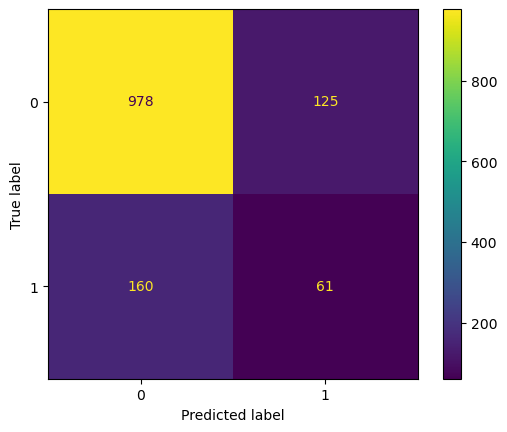

In [70]:
GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_ana_EmAtRate_L1= hr_log( random_state=42)
GEN_hr_ana_EmAtRate_L1.fit(GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled)

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" training - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")


GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_dp_p= GEN_hr_ana_EmAtRate_L1.predict(GEN_hr_idp_test)
print("Accuracy Score: ", GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))
print(GEN_hr_ana_EmAtRateifi(GEN_hr_dp_test, GEN_hr_dp_p))
GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
plt.style.use('default')
vr = GEN_hr_ana_EmAtRateion(GEN_hr_dp_test, GEN_hr_dp_p)
vr_d = GEN_hr_ana_EmAtRatexdi(confusion_matrix = vr, display_labels = [0,1])
vr_d.plot()
print(" testing - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")

### Support vector machine

 training - duratn: 872.414525270462 

Accuracy Score:  0.5768246206356173
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1103
           1       0.33      0.26      0.29       221

    accuracy                           0.79      1324
   macro avg       0.59      0.58      0.58      1324
weighted avg       0.77      0.79      0.78      1324

 testing - duratn: 0.5335209369659424 



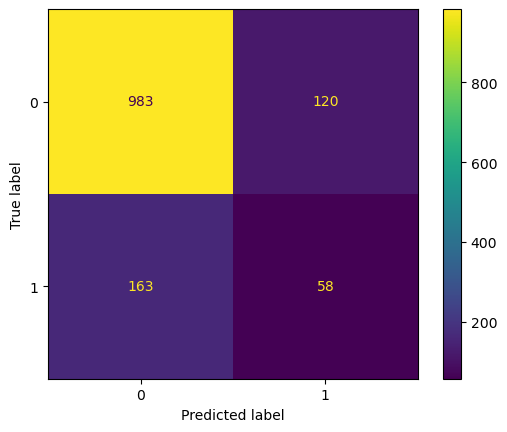

In [71]:
from sklearn.svm import SVC as hr_svc
GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_ana_EmAtRate_L2= hr_svc(kernel= 'linear', random_state=42)
GEN_hr_ana_EmAtRate_L2.fit(GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled)

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" training - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")


GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_dp_p= GEN_hr_ana_EmAtRate_L2.predict(GEN_hr_idp_test)
print("Accuracy Score: ", GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))
print(GEN_hr_ana_EmAtRateifi(GEN_hr_dp_test, GEN_hr_dp_p))


vr = GEN_hr_ana_EmAtRateion(GEN_hr_dp_test, GEN_hr_dp_p)
vr_d = GEN_hr_ana_EmAtRatexdi(confusion_matrix = vr, display_labels = [0,1])
vr_d.plot()

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" testing - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")

### Decision Tree

 training - duratn: 0.09032917022705078 

Accuracy Score:  0.9090161345241075
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1103
           1       0.82      0.86      0.84       221

    accuracy                           0.94      1324
   macro avg       0.90      0.91      0.90      1324
weighted avg       0.95      0.94      0.95      1324

 testing - duratn: 0.046942710876464844 



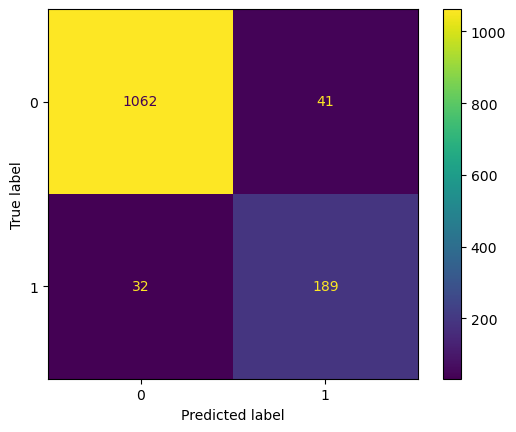

In [72]:
from sklearn.tree import DecisionTreeClassifier as hr_dt
GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_ana_EmAtRate_L3= hr_dt(random_state=42)
GEN_hr_ana_EmAtRate_L3.fit(GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled)

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" training - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")


GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_dp_p= GEN_hr_ana_EmAtRate_L3.predict(GEN_hr_idp_test)
print("Accuracy Score: ", GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))
print(GEN_hr_ana_EmAtRateifi(GEN_hr_dp_test, GEN_hr_dp_p))

vr = GEN_hr_ana_EmAtRateion(GEN_hr_dp_test, GEN_hr_dp_p)
vr_d = GEN_hr_ana_EmAtRatexdi(confusion_matrix = vr, display_labels = [0,1])
vr_d.plot()

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" testing - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")


### Random Forest

 training - duratn: 0.6421365737915039 

Accuracy Score:  0.9416215750544586
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1103
           1       0.96      0.89      0.92       221

    accuracy                           0.98      1324
   macro avg       0.97      0.94      0.95      1324
weighted avg       0.97      0.98      0.97      1324

 testing - duratn: 0.07815885543823242 



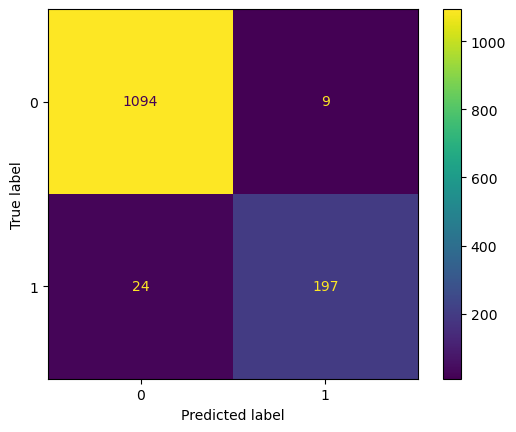

In [73]:
from sklearn.ensemble import RandomForestClassifier as hr_rf

GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_ana_EmAtRate_L4= hr_rf(random_state=42)
GEN_hr_ana_EmAtRate_L4.fit(GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled)

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" training - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")


GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_dp_p= GEN_hr_ana_EmAtRate_L4.predict(GEN_hr_idp_test)
print("Accuracy Score: ", GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))
print(GEN_hr_ana_EmAtRateifi(GEN_hr_dp_test, GEN_hr_dp_p))

vr = GEN_hr_ana_EmAtRateion(GEN_hr_dp_test, GEN_hr_dp_p)
vr_d = GEN_hr_ana_EmAtRatexdi(confusion_matrix = vr, display_labels = [0,1])
vr_d.plot()

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" testing - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")



### Cat Boost

Learning rate set to 0.018409
0:	learn: 0.6857065	total: 183ms	remaining: 3m 2s
1:	learn: 0.6781360	total: 186ms	remaining: 1m 32s
2:	learn: 0.6709554	total: 190ms	remaining: 1m 3s
3:	learn: 0.6643285	total: 194ms	remaining: 48.2s
4:	learn: 0.6574704	total: 197ms	remaining: 39.2s
5:	learn: 0.6522677	total: 200ms	remaining: 33.2s
6:	learn: 0.6472977	total: 204ms	remaining: 28.9s
7:	learn: 0.6420455	total: 211ms	remaining: 26.1s
8:	learn: 0.6367659	total: 215ms	remaining: 23.7s
9:	learn: 0.6311661	total: 218ms	remaining: 21.6s
10:	learn: 0.6246245	total: 222ms	remaining: 20s
11:	learn: 0.6197459	total: 225ms	remaining: 18.5s
12:	learn: 0.6146598	total: 227ms	remaining: 17.3s
13:	learn: 0.6102462	total: 231ms	remaining: 16.3s
14:	learn: 0.6065747	total: 234ms	remaining: 15.4s
15:	learn: 0.6026135	total: 237ms	remaining: 14.6s
16:	learn: 0.5981348	total: 240ms	remaining: 13.9s
17:	learn: 0.5947053	total: 243ms	remaining: 13.2s
18:	learn: 0.5909540	total: 246ms	remaining: 12.7s
19:	learn: 0

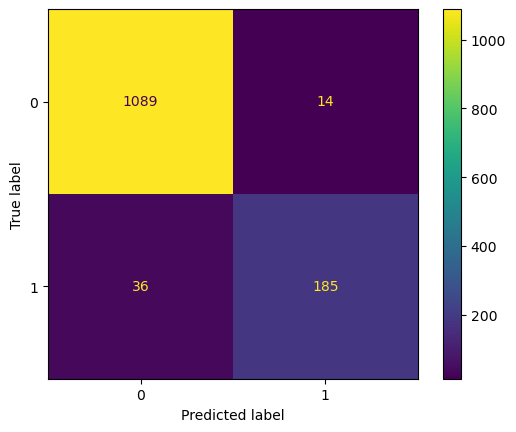

In [74]:
from catboost import CatBoostClassifier as hr_cat
GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_ana_EmAtRate_L5= hr_cat(random_state=42)
GEN_hr_ana_EmAtRate_L5.fit(GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled)

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" training - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")


GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_dp_p= GEN_hr_ana_EmAtRate_L5.predict(GEN_hr_idp_test)
print("Accuracy Score: ", GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))
print(GEN_hr_ana_EmAtRateifi(GEN_hr_dp_test, GEN_hr_dp_p))

vr = GEN_hr_ana_EmAtRateion(GEN_hr_dp_test, GEN_hr_dp_p)
vr_d = GEN_hr_ana_EmAtRatexdi(confusion_matrix = vr, display_labels = [0,1])
vr_d.plot()

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" testing - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")



### Light Gbm

[LightGBM] [Info] Number of positive: 1298, number of negative: 2596
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 613
[LightGBM] [Info] Number of data points in the train set: 3894, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
 training - duratn: 0.4993891716003418 

Accuracy Score:  0.8796166768541575
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1103
           1       0.87      0.78      0.82       221

    accuracy                           0.94      1324
   macro avg       0.91      0.88      0.90      1324
weighted avg       0.94      0.94      0.94      1324

 testing - duratn: 0.06610584259033203 



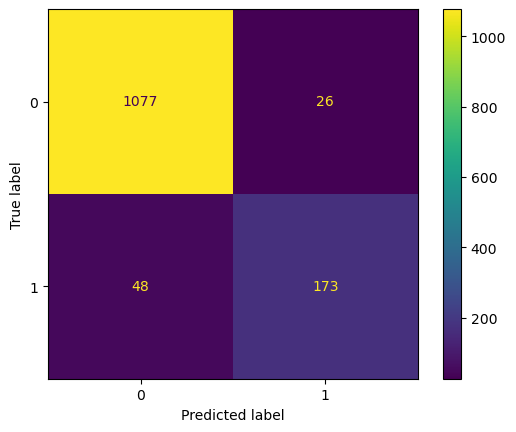

In [75]:
from lightgbm import LGBMClassifier as hr_lgm
GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_ana_EmAtRate_L6= hr_lgm(random_state=42)
GEN_hr_ana_EmAtRate_L6.fit(GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled)

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" training - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")


GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_dp_p= GEN_hr_ana_EmAtRate_L6.predict(GEN_hr_idp_test)
print("Accuracy Score: ", GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))
print(GEN_hr_ana_EmAtRateifi(GEN_hr_dp_test, GEN_hr_dp_p))

vr = GEN_hr_ana_EmAtRateion(GEN_hr_dp_test, GEN_hr_dp_p)
vr_d = GEN_hr_ana_EmAtRatexdi(confusion_matrix = vr, display_labels = [0,1])
vr_d.plot()

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" testing - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")



### XG Boost

 training - duratn: 0.31589722633361816 

Accuracy Score:  0.957907885938391
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1103
           1       0.94      0.93      0.93       221

    accuracy                           0.98      1324
   macro avg       0.96      0.96      0.96      1324
weighted avg       0.98      0.98      0.98      1324

 testing - duratn: 0.05951714515686035 



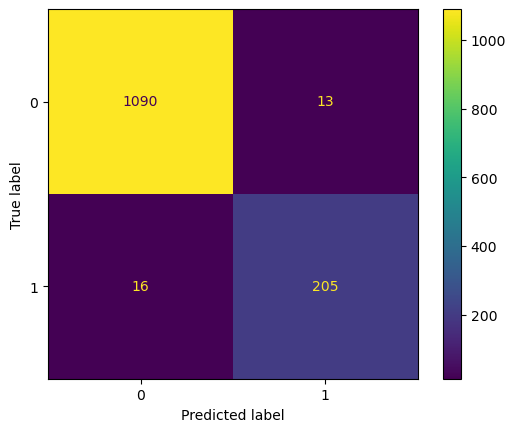

In [76]:
from xgboost import XGBClassifier as hr_xg
GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_ana_EmAtRate_L7= hr_xg(random_state=42)
GEN_hr_ana_EmAtRate_L7.fit(GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled)

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" training - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")


GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_dp_p= GEN_hr_ana_EmAtRate_L7.predict(GEN_hr_idp_test)
print("Accuracy Score: ", GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))
print(GEN_hr_ana_EmAtRateifi(GEN_hr_dp_test, GEN_hr_dp_p))

vr = GEN_hr_ana_EmAtRateion(GEN_hr_dp_test, GEN_hr_dp_p)
vr_d = GEN_hr_ana_EmAtRatexdi(confusion_matrix = vr, display_labels = [0,1])
vr_d.plot()

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" testing - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")




AUC-score is  0.957907885938391


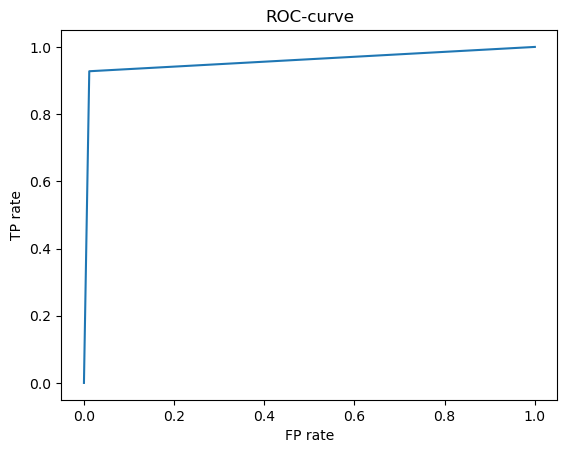

In [77]:
import seaborn as hr_EmAtRate_s
import matplotlib.pyplot as hr_EmAtRate_n
fpr_GEN_hr_ana, tpr_GEN_hr_ana, thr_GEN_hr_ana = hr_roc(GEN_hr_dp_test, GEN_hr_dp_p)

hr_EmAtRate_n.plot(fpr_GEN_hr_ana, tpr_GEN_hr_ana)
hr_EmAtRate_n.ylabel('TP rate')
hr_EmAtRate_n.xlabel('FP rate')
hr_EmAtRate_n.title('ROC-curve')
print('AUC-score is ', GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))

### MLP classifier

 training - duratn: 1.189589023590088 

Accuracy Score:  0.6320134721020008
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1103
           1       0.38      0.39      0.39       221

    accuracy                           0.79      1324
   macro avg       0.63      0.63      0.63      1324
weighted avg       0.79      0.79      0.79      1324

 testing - duratn: 0.04330897331237793 



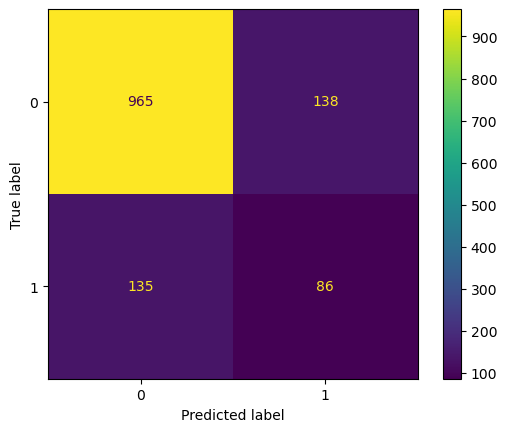

In [78]:
from sklearn.neural_network import MLPClassifier as hr_mlp
GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_ana_EmAtRate_L8= hr_mlp( random_state=42)
GEN_hr_ana_EmAtRate_L8.fit(GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled)

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" training - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")


GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_dp_p= GEN_hr_ana_EmAtRate_L8.predict(GEN_hr_idp_test)
print("Accuracy Score: ", GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))
print(GEN_hr_ana_EmAtRateifi(GEN_hr_dp_test, GEN_hr_dp_p))

vr = GEN_hr_ana_EmAtRateion(GEN_hr_dp_test, GEN_hr_dp_p)
vr_d = GEN_hr_ana_EmAtRatexdi(confusion_matrix = vr, display_labels = [0,1])
vr_d.plot()

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" testing - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")




** Best Model is XGBoost with 95% accuracy

### Hyperparameter Tuning

In [79]:
### Hyperparamter tuning for best model
"""find out best parameters """
GEN_hr_ana_choice = { 'max_depth': [5, 10, 14, 18],
            'reg_alpha': [0, 0.1, 0.01, 0.001],
            'learning_rate':[0.5, 0.4, 0.3, 0.1]}

GEN_hr_ana_choice_P  = hr_xg(random_state= 25)
GEN_hr_ana_choice_P = GEN_hr_ana_EmAtRateear(GEN_hr_ana_choice_P, GEN_hr_ana_choice, cv=2, verbose=1)
GEN_hr_ana_choice_P.fit(GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled)

display("choosen par: :", GEN_hr_ana_choice_P.best_params_)
print("choosen par - score: ", GEN_hr_ana_choice_P.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits


'choosen par: :'

{'learning_rate': 0.5, 'max_depth': 14, 'reg_alpha': 0}

choosen par - score:  0.9232152028762198


 training - duratn: 0.7727398872375488 

Accuracy Score:  0.9551962356879428
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1103
           1       0.96      0.92      0.94       221

    accuracy                           0.98      1324
   macro avg       0.97      0.96      0.96      1324
weighted avg       0.98      0.98      0.98      1324

 testing - duratn: 0.0585322380065918 



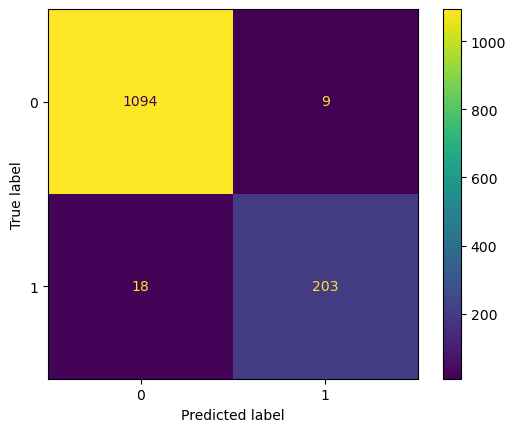

In [80]:
GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_ana_EmAtRate_L9= hr_xg( max_depth=14, reg_alpha=0, learning_rate=0.5)

GEN_hr_ana_EmAtRate_L9.fit(GEN_hr_idp_train_oversampled, GEN_hr_dp_train_oversampled)

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" training - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")


GEN_hr_ana_EmAtRate_dura1 = GEN_hr_ana_EmAtRatedura.time()
GEN_hr_dp_p= GEN_hr_ana_EmAtRate_L9.predict(GEN_hr_idp_test)
print("Accuracy Score: ", GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))
print(GEN_hr_ana_EmAtRateifi(GEN_hr_dp_test, GEN_hr_dp_p))

vr = GEN_hr_ana_EmAtRateion(GEN_hr_dp_test, GEN_hr_dp_p)
vr_d = GEN_hr_ana_EmAtRatexdi(confusion_matrix = vr, display_labels = [0,1])
vr_d.plot()

GEN_hr_ana_EmAtRate_dura2 = GEN_hr_ana_EmAtRatedura.time()
print(" testing - duratn:", GEN_hr_ana_EmAtRate_dura2 - GEN_hr_ana_EmAtRate_dura1,"\n")



AUC-score is  0.9551962356879428


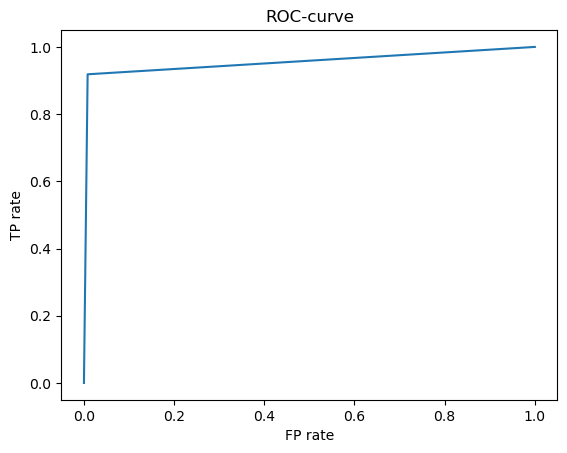

In [81]:
import seaborn as hr_EmAtRate_s
import matplotlib.pyplot as hr_EmAtRate_n
fpr_GEN_hr_ana, tpr_GEN_hr_ana, thr_GEN_hr_ana = hr_roc(GEN_hr_dp_test, GEN_hr_dp_p)

hr_EmAtRate_n.plot(fpr_GEN_hr_ana, tpr_GEN_hr_ana)
hr_EmAtRate_n.ylabel('TP rate')
hr_EmAtRate_n.xlabel('FP rate')
hr_EmAtRate_n.title('ROC-curve')
print('AUC-score is ', GEN_hr_ana_EmAtRateaucs(GEN_hr_dp_test, GEN_hr_dp_p))